In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

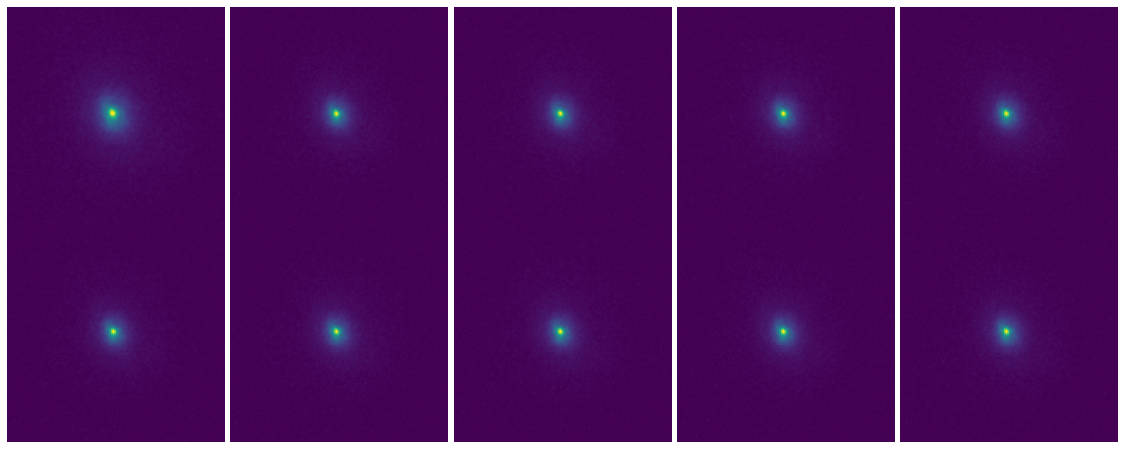

In [2]:
fig, axs = plt.subplots(2, 5, figsize=(20,8))
ims = np.zeros((2,5,128,128))
for i in range(2):
    for j in range(5):
        im = np.load("test/image_%07d.npy" % (i*5+j))
        ims[i,j]=im
        axs[i,j].imshow(im, vmin=0, vmax=.5)
        axs[i,j].axis('off')
plt.subplots_adjust(hspace=0,wspace=0)


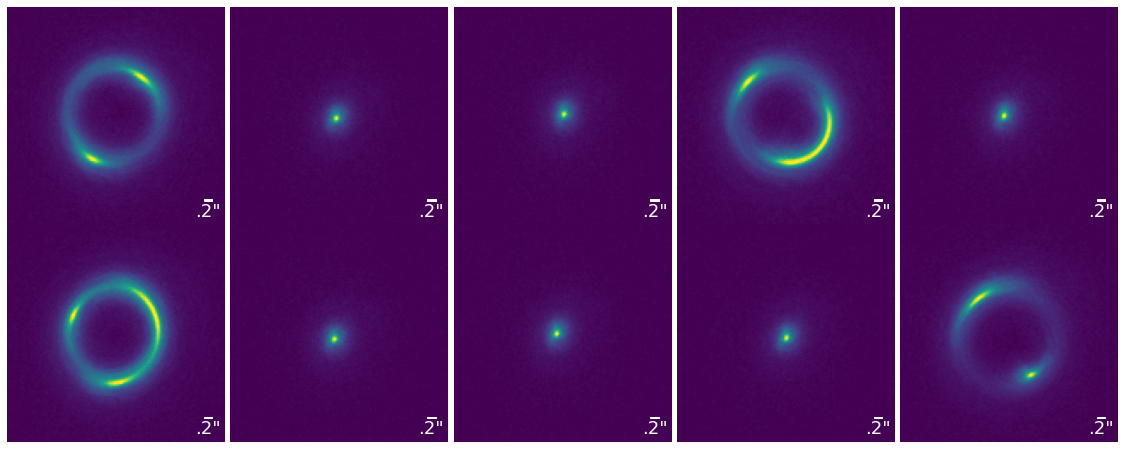

In [3]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=18)

fig, axs = plt.subplots(2, 5, figsize=(20,8))
ims = np.zeros((2,5,128,128))
for i in range(2):
    for j in range(5):
        im = np.load("test3/image_%07d.npy" % (i*5+j))
        ims[i,j]=im
        axs[i,j].imshow(im, vmin=0, vmax=0.5, origin="lower")
        axs[i,j].axis('off')
        scalebar = AnchoredSizeBar(axs[i,j].transData,5, '.2"', 'lower right', pad=0.1,color='white',frameon=False,size_vertical=1,fontproperties=fontprops)
        axs[i,j].add_artist(scalebar)
        axs[i,j].set_yticks([])
        axs[i,j].set_xticks([])
    
plt.subplots_adjust(hspace=0,wspace=0)

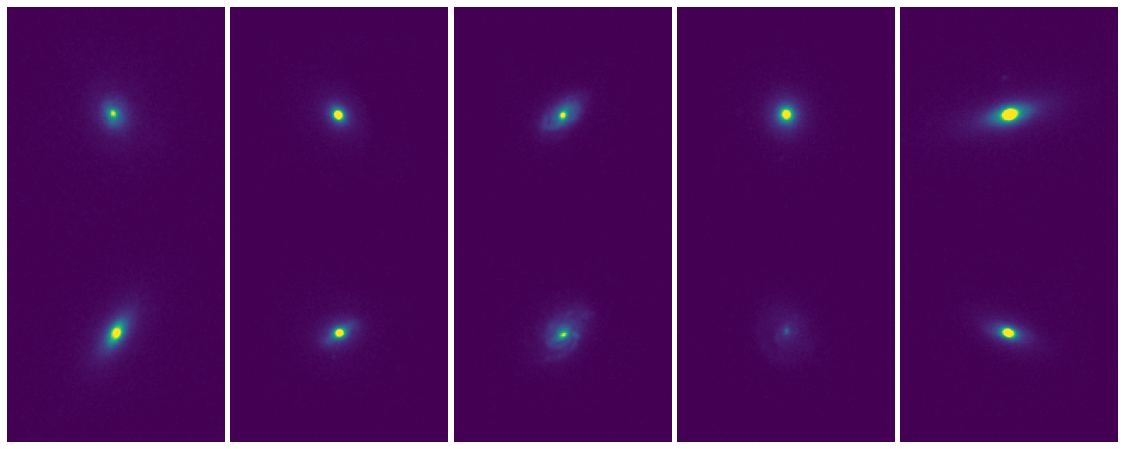

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(20,8))
ims2 = np.zeros((2,5,128,128))
for i in range(2):
    for j in range(5):
        im = np.load("test2/image_%07d.npy" % (i*5+j))
        ims2[i,j]=im
        axs[i,j].imshow(im, vmin=0, vmax=0.5)
        axs[i,j].axis('off')
plt.subplots_adjust(hspace=0,wspace=0)

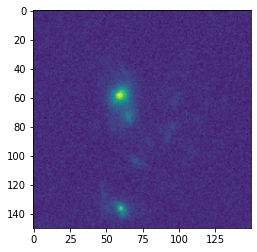

In [5]:
im = np.load('../datasets/UDF/4110z.npy')
plt.imshow(im)

(-0.5, 127.5, 127.5, -0.5)

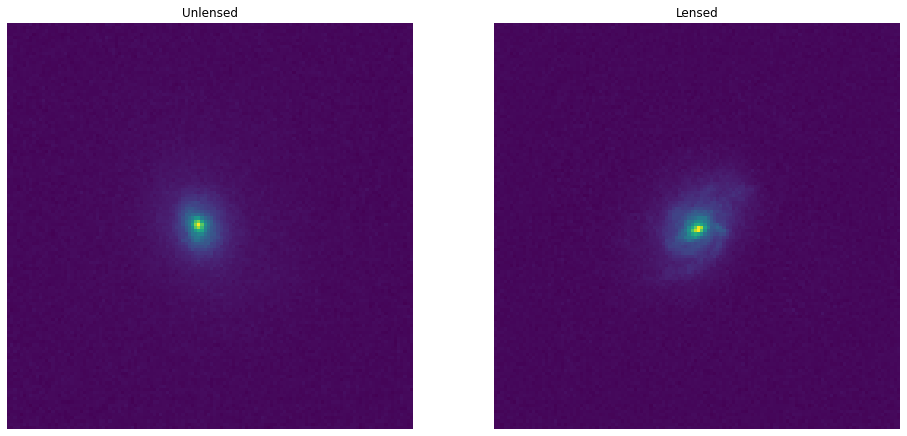

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].imshow(ims[1,2])
axs[0].set_title('Unlensed')
axs[1].imshow(ims2[1,2])
axs[1].set_title('Lensed')
axs[0].axis('off')
axs[1].axis('off')

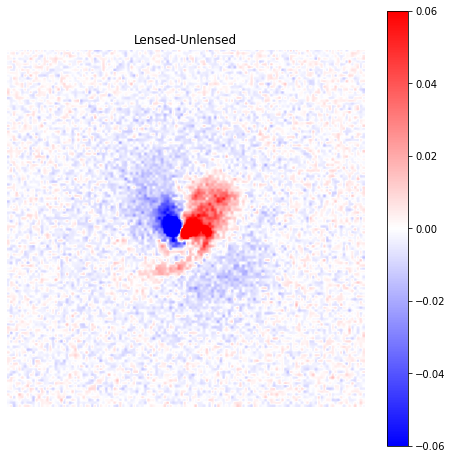

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(ims2[1,2]-ims[1,2], cmap='bwr', vmin=-.06, vmax=.06)
plt.axis('off')
plt.title("Lensed-Unlensed")
plt.colorbar()

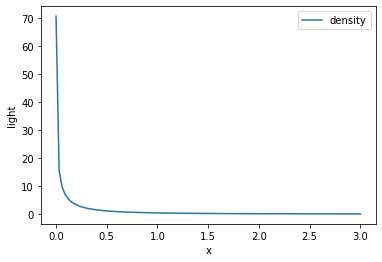

In [2]:
from lenstronomy.LightModel.Profiles.sersic import Sersic
sersic = Sersic()
def density(x):
    return sersic.function(x, 0, .1, R_sersic=2.3, n_sersic=4)
xS = np.linspace(0.001,3, 100)
yS = density(xS)
plt.plot(xS,yS, label="density")
# plt.plot(x,x, label="y=x")
# plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("light")
plt.legend()


In [3]:
import scipy.integrate
scipy.integrate.quad(density, 0, 3)

(3.290940674650662, 3.751793897777134e-08)

In [4]:
import scipy.integrate
scipy.integrate.quad(density, 0, 3)

(3.290940674650662, 3.751793897777134e-08)

In [5]:
from lenstronomy.LensModel.Profiles.gauss_decomposition import SersicEllipseGaussDec
sersic = SersicEllipseGaussDec()
def density(x):
    return sersic.density_2d(x, 0, R_sersic=alpha_Rs, n_sersic=4, k_eff=.01)
xS = np.linspace(0.0001,.01, 100)
yS = density(xS)
plt.plot(xS,yS, label="density")
# plt.plot(x,x, label="y=x")
# plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("light")
plt.legend()

NameError: name 'alpha_Rs' is not defined

In [6]:
from lenstronomy.LensModel.Profiles.nfw import NFW
from lenstronomy.Cosmo.lens_cosmo import LensCosmo

def density(x):
    return sersic.density_2d(x, 0, R_sersic=alpha_Rs, n_sersic=4, k_eff=.02)
xS = np.linspace(0.0001,.01, 100)
yS = density(xS)

lens_cosmo = LensCosmo(z_lens=.2, z_source=6.0)
nfw = NFW()
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=c[0])
rho0 = nfw.alpha2rho0(alpha_Rs, Rs_angle)
def density(x):
    return nfw.density_2d(x,0, Rs_angle, rho0)
x = np.linspace(0.0001,.01, 100)
y = density(x)
plt.plot(x,y, label="NFW")

# Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=1e12, c=concs[0])
# rho0 = nfw.alpha2rho0(alpha_Rs, Rs_angle)
# y2 = density(x)
# plt.plot(x,y2, label="1e12")

# plt.plot(x,x, label="y=x")
# plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("2D density")
plt.plot(xS, yS, label="Sersic")
plt.legend()
plt.xscale('log')
plt.yscale('log')
# plt.vlines(theta_E0, 1e-2, 1e1, color="k", linestyle="--", alpha=0.5)
plt.title("1e"+str(int(np.log10(m))))

NameError: name 'alpha_Rs' is not defined

In [7]:
c=4
k=0.1
theta_E_S(c, 1e13, 0.2, k), equality(k, c, 1e13, 0.2), equality(k, c, 1e13, 0.2)-theta_E_S(c, 1e13, 0.2, k)

NameError: name 'theta_E_S' is not defined

In [8]:
c=4
k=0.15
theta_E_S(c, 1e13, 0.2, k), equality(k, c, 1e13, 0.2), equality(k, c, 1e13, 0.2)-theta_E_S(c, 1e13, 0.2, k)

NameError: name 'theta_E_S' is not defined

In [9]:
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
lens_cosmo = LensCosmo(z_lens=.5, z_source=6.0)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=1e11, c=5)
Rs_angle, alpha_Rs

(2.5892031187251545, 0.05969297246889009)

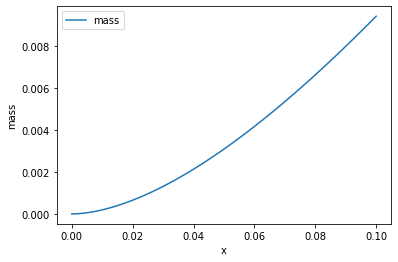

In [10]:
from lenstronomy.LensModel.Profiles.nfw import NFW

nfw = NFW()
def mass(x):
#     return nfw.mass_2d(x, Rs, rho0)
    return nfw.mass_2d(x,0.6837325630455899,nfw.alpha2rho0(0.05842512122653773, 0.6837325630455899))
x = np.linspace(0,.1, 100)
y = mass(x)
plt.plot(x,y, label="mass")
# plt.plot(x,x, label="y=x")
# plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("mass")
plt.legend()
# plt.xlim(0,1)

In [11]:
lens_cosmo.mass_in_theta_E(1)/1e11
lens_cosmo.sis_theta_E2sigma_v(.1)
lens_cosmo.mass_in_theta_E(.1)/1e11


0.02071486669236908

In [12]:
from lenstronomy.Cosmo.nfw_param import NFWParam

nfw_param = NFWParam(cosmo = lens_cosmo)
c= nfw_param.c_M_z(M=1e13,z=.05)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=1e13, c=6)
Rs_angle, alpha_Rs

(10.01501356985838, 1.3585053953882946)

Text(0.5, 0, 'Image position')

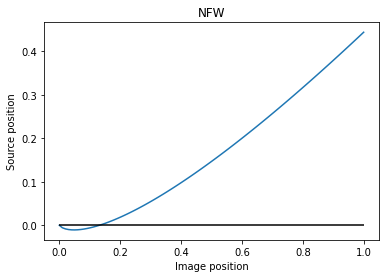

In [13]:
from lenstronomy.LensModel.lens_model import LensModel
lens_model = LensModel(['NFW'], z_lens=.5, z_source=6)

x = np.linspace(0, 1, 100)
y = lens_model.ray_shooting(x, 0, [{'alpha_Rs': alpha_Rs, 'Rs': Rs_angle, 'center_x': 0., 'center_y': 0.}])[0]
plt.plot(x,y)
plt.hlines(0, 0., 1, color='k')
plt.title("NFW")
plt.ylabel("Source position")
plt.xlabel("Image position")

Text(0.5, 0, 'Image position')

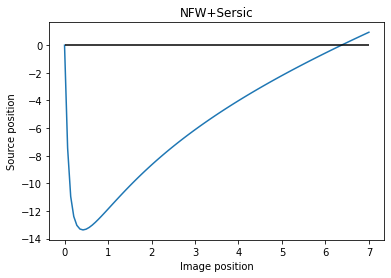

In [14]:
lens_cosmo = LensCosmo(z_lens=.2, z_source=6.0)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=1e13, c=6)

lens_model = LensModel(['NFW', 'SERSIC_ELLIPSE_GAUSS_DEC'], z_lens=.2, z_source=6)

x = np.linspace(0, 7, 100)
y = lens_model.ray_shooting(x, 0, [{'alpha_Rs': alpha_Rs, 'Rs': Rs_angle, 'center_x': 0., 'center_y': 0.}, {'R_sersic': 2.3, 'n_sersic': 4, 'k_eff':1.1625459834223761, 'center_x': 0., 'center_y': 0.}])[0]
plt.plot(x,y)
plt.hlines(0, 0., 7, color='k')
plt.title("NFW+Sersic")
plt.ylabel("Source position")
plt.xlabel("Image position")

In [21]:
z_sources = np.linspace(1,10,20)
for i in range(len(z_sources)):
    lens_cosmo = LensCosmo(z_lens=.2, z_source=z_sources[i])
    Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=1e13, c=6)
    print(alpha_Rs)

1.1818716344139149
1.2729106736300493
1.318888774074729
1.3466315947979164
1.3652394825734453
1.3786276970398224
1.388752875170466
1.3967002739807677
1.4031200652728377
1.4084256025785
1.4128923833095703
1.416711217017819
1.4200185389308975
1.4229145613300538
1.4254745991191815
1.4277563886493954
1.4298049625226021
1.4316559832175944
1.4333380762122088
1.4348744967398548


In [15]:
lens_cosmo.arcsec2phys_lens(2.3)*1000

7.838747045564439

In [16]:
lens_cosmo = LensCosmo(z_lens=0.2, z_source=6.0)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=1e13, c=7)
Rs_angle, alpha_Rs

(15.947289365121678, 1.555660705861759)

In [18]:
import scipy.optimize as opt

def theta_E_S(c, m=1e13, z_lens=0.2, k=.1):
    lens_model = LensModel(['NFW', 'SERSIC_ELLIPSE_GAUSS_DEC'], z_lens=z_lens, z_source=6)
    lens_cosmo = LensCosmo(z_lens=z_lens, z_source=6.0)
    Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=c)
#     print(Rs_angle, alpha_Rs)
    return opt.root(lambda x: lens_model.alpha(x,0, [{'alpha_Rs': alpha_Rs, 'Rs': Rs_angle, 'center_x': 0., 'center_y': 0.}, 
                {'R_sersic': alpha_Rs, 'n_sersic': 4, 'k_eff':k, 'center_x': 0., 'center_y': 0.}])[0]-x, 1).x[0]

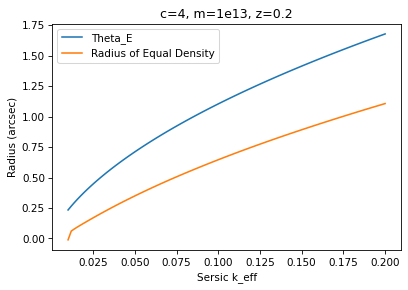

In [14]:
k = np.linspace(.01,.2,100)
TES = np.array([theta_E_S(c=7.505253155610009, m=1e13, z_lens=0.2, k=ki) for ki in k])

def NFW_S_diff(x, k, c=6, m=1e13, z_lens=0.2, constraint=1):
    lens_cosmo = LensCosmo(z_lens=z_lens, z_source=6.0)
    Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=c)
    serD = sersic.density_2d(x, 0, R_sersic=alpha_Rs, n_sersic=4, k_eff=k)
    rho0 = nfw.alpha2rho0(alpha_Rs, Rs_angle)
    nfwD = nfw.density_2d(x,0, Rs_angle, rho0)
    return serD-nfwD*constraint
#     if serD>0.5*nfwD and serD<1.5*nfwD:
#         return 0
#     return serD-nfwD

#     a = serD-1.5*nfwD
#     b = serD-0.5*nfwD
#     if abs(a)>abs(b):
#         return b
#     return a
def equality(k, c=6, m=1e13, z_lens=0.2, constraint=1):
    return opt.root(lambda x: NFW_S_diff(x,k,c,m,z_lens, constraint=constraint), .1).x[0]
eqK = np.array([equality(ki, c=7.505253155610009, m=1e13, z_lens=0.2) for ki in k])

plt.figure(dpi=75)
plt.plot(k, TES, label="Theta_E")
plt.plot(k, eqK, label="Radius of Equal Density")
plt.title("c=4, m=1e13, z=0.2")
plt.xlabel("Sersic k_eff")
plt.ylabel("Radius (arcsec)")
plt.legend();

In [15]:
def k_crit(c=6,m=1e13,z_lens=0.2, constraint=1):
    kcrit = opt.root(lambda k: equality(k, c=c, m=m, z_lens=z_lens, constraint=constraint)-theta_E_S(c=c, m=m, z_lens=z_lens, k=k), .1).x[0]
    if kcrit==.1:
        diff = equality(kcrit, c=c, m=m, z_lens=z_lens, constraint=constraint)-theta_E_S(c=c, m=m, z_lens=z_lens, k=kcrit)
        if diff<0:
            return k_crit(c=c,m=m,z_lens=z_lens,constraint=constraint-.25)
        return k_crit(c=c, m=m, z_lens=z_lens, constraint=constraint+.25)
    print(constraint)
    return kcrit

k0 = k_crit(c=7.5, m=1e13, z_lens=0.2)
k0, theta_E_S(7.5,1e13,0.2,k0)

0.5


(0.09725230709838091, 1.0852193297877315)

In [224]:
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=concs[0])
ks[0], theta_Es[0], concs[0], alpha_Rs

(0.018794181570515874,
 0.04935492526246119,
 7.517672628206348,
 0.3301936959857828)

In [79]:
m=1e13
c = mass_concentration(z=np.ones(1000)*0.2,m_200=m)
# ks = [k_crit(c=ci,m=1e13,z_lens=0.2) for ci in concs]
ks = c*.01*(m/1e13)**(1/3)*(np.log10(m)-9)/(13-9)
# theta_Es = [theta_E_S(c[i],m,0.2,ks[i]) for i in range(len(c))]

In [80]:
theta_E_S(max(c),m,0.2,np.percentile(ks,84))

1.8380580125492543

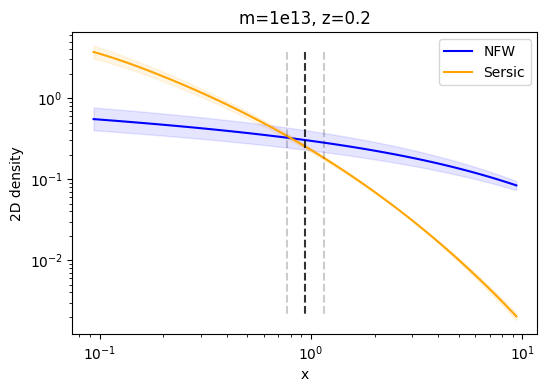

In [81]:
from lenstronomy.LensModel.Profiles.nfw import NFW
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
lens_cosmo = LensCosmo(z_lens=0.2, z_source=0.5)
plt.figure(dpi=100)

factor=1.5*m/1e13

def theta_E_S(c, m=1e13, z_lens=0.2, k=.1):
    lens_model = LensModel(['NFW', 'SERSIC_ELLIPSE_GAUSS_DEC'], z_lens=z_lens, z_source=6)
    lens_cosmo = LensCosmo(z_lens=z_lens, z_source=6.0)
    Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=c)
#     print(Rs_angle, alpha_Rs)
    return opt.root(lambda x: lens_model.alpha(x,0, [{'alpha_Rs': alpha_Rs, 'Rs': Rs_angle, 'center_x': 0., 'center_y': 0.}, 
                {'R_sersic': factor*np.sqrt(Rs_angle/10), 'n_sersic': 4, 'k_eff':k, 'center_x': 0., 'center_y': 0.}])[0]-x, 1).x[0]


theta_E0 = theta_E_S(np.percentile(c,50),m,0.2,np.percentile(ks,50))
theta_E_lower = theta_E_S(np.percentile(c,16),m,0.2,np.percentile(ks,16))
theta_E_upper = theta_E_S(np.percentile(c,84),m,0.2,np.percentile(ks,84))


def density(x):
    return sersic.density_2d(x, 0, R_sersic=factor*np.sqrt(Rs_angle/10), n_sersic=4, k_eff=k_eff)
xS = np.logspace(np.log10(theta_E0)-1,np.log10(theta_E0)+1, 100)
# xS = np.logspace(-9,-2,100)

k_eff = np.percentile(ks,16)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=np.percentile(c,16))
lowerS = density(xS)
k_eff = np.percentile(ks,84)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=np.percentile(c,84))
upperS = density(xS)
k_eff = np.percentile(ks,50)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=np.percentile(c,50))
yS = density(xS)

lens_cosmo = LensCosmo(z_lens=.2, z_source=6.0)
nfw = NFW()
def density(x):
    return nfw.density_2d(x,0, Rs_angle, rho0)
x =  np.logspace(np.log10(theta_E0)-1,np.log10(theta_E0)+1, 100)
# x = np.logspace(-9,-2,100)

Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=np.percentile(c,50))
rho0 = nfw.alpha2rho0(alpha_Rs, Rs_angle)
y = density(x)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=np.percentile(c,16))
rho0 = nfw.alpha2rho0(alpha_Rs, Rs_angle)
lower = density(x)
Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=np.percentile(c,84))
rho0 = nfw.alpha2rho0(alpha_Rs, Rs_angle)
upper = density(x)

plt.plot(x,y, label="NFW", color="blue")

plt.xlabel("x")
plt.ylabel("2D density")
plt.plot(xS, yS, label="Sersic", color="orange")
plt.xscale('log')
plt.yscale('log')
plt.vlines([theta_E_lower, theta_E_upper], np.max(yS), np.min(yS), color="k", linestyle="--", alpha=0.2)
plt.vlines(theta_E0, np.max(yS), np.min(yS), color="k", linestyle="--", alpha=0.8)

plt.title("m=1e"+str(int(np.log10(m)))+", z=0.2")

plt.fill_between(xS, lowerS, upperS, color='orange', alpha=.1)
plt.fill_between(x, lower, upper, color='blue', alpha=.1)
plt.legend()

1.5470026527745378e-07

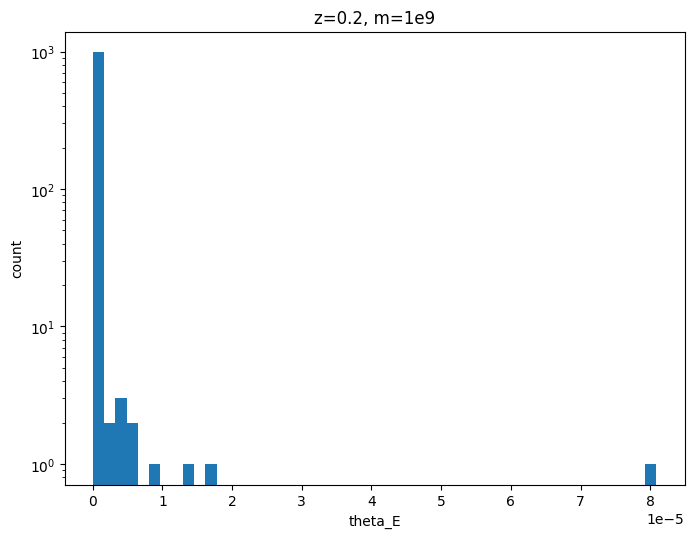

In [64]:
theta_Es = [theta_E_S(c[i],m,0.2,ks[i]) for i in range(len(c))]
plt.figure(figsize=(8,6),dpi=100)
plt.hist(theta_Es, bins=50, log=True)
plt.title("z=0.2, m=1e"+str(int(np.log10(m))))
plt.xlabel("theta_E")
plt.ylabel("count")
np.mean(theta_Es)

Text(0, 0.5, 'count')

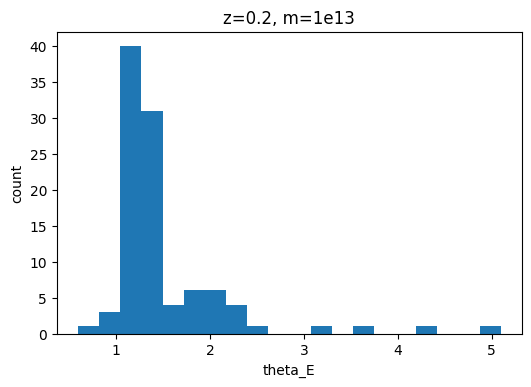

In [23]:
concs2 = mass_concentration_dist(z=np.ones(100)*0.2,m_200=1e13)
ks2 = [k_crit(c=ci,m=1e13,z_lens=0.2) for ci in concs2]
theta_Es2 = [theta_E_S(concs2[i],1e13,0.2,ks2[i]) for i in range(len(concs2))]
plt.figure(dpi=100)
plt.hist(theta_Es2, bins=20)
plt.title("z=0.2, m=1e13")
plt.xlabel("theta_E")
plt.ylabel("count")

Text(0.5, 0, 'Image position')

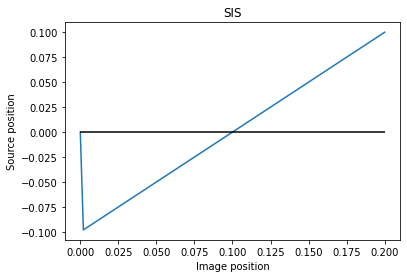

In [33]:
from lenstronomy.LensModel.Profiles.sis import SIS

sis = SIS()
lens_model = LensModel(['SIS'], z_lens=2.0, z_source=6)
x = np.linspace(0., .2, 100)
y = lens_model.ray_shooting(x, np.zeros(len(x)), [{'theta_E':.1, 'center_x': 0., 'center_y': 0.}])[0]
plt.plot(x,y)
plt.hlines(0, 0., .2, color='k')
plt.title("SIS")
plt.ylabel("Source position")
plt.xlabel("Image position")

In [40]:
import time
t = time.time()
for i in range(100):
    theta_E(c=8,m=1e11, z_lens=2.0)
t2 = time.time()
t2-t

0.5135180950164795

In [25]:
import scipy.optimize as opt

def theta_E(c, m=1e13, z_lens=0.5):
    lens_model = LensModel(['NFW'], z_lens=z_lens, z_source=6)
    lens_cosmo = LensCosmo(z_lens=z_lens, z_source=6.0)
    Rs_angle, alpha_Rs = lens_cosmo.nfw_physical2angle(M=m, c=c)
#     print(Rs_angle, alpha_Rs)
    return opt.root(lambda x: lens_model.alpha(x,0, [{'alpha_Rs': alpha_Rs, 'Rs': Rs_angle, 'center_x': 0., 'center_y': 0.}])[0]-x, 1).x[0]

In [42]:
theta_E(8,1e13,0.5)

0.4311786716721394

In [22]:
from colossus.lss import peaks, bias
from Utils.cosmology_utils import get_cosmology
cosmo = get_cosmology({'cosmology_name':'planck18'})
from scipy.stats import norm, truncnorm, uniform


def mass_concentration(z,m_200,scatter_mult=1.0):
    # Get the concentration parameters
    c_0 = 17
    zeta = -0.25
    beta = 0.7
    m_ref = 1e8
    dex_scatter = 0.13 * scatter_mult

    h = 0.6766
    peak_heights = peaks.peakHeight(m_200*h,z)
    peak_height_ref = peaks.peakHeight(m_ref*h,0)

    # Now get the concentrations and add scatter
    concentrations = c_0*(1+z)**(zeta)*(peak_heights/peak_height_ref)**(
        -beta)
    if isinstance(concentrations,np.ndarray):
        conc_scatter = np.random.randn(len(concentrations))*dex_scatter
    elif isinstance(concentrations,float):
        conc_scatter = np.random.randn()*dex_scatter
    concentrations = 10**(np.log10(concentrations)+conc_scatter)


    return concentrations

def mass_concentration_dist(z, m_200, scatter_mult=1.0):
    # Get the concentration parameters
    c_0 = uniform(loc=16,scale=2).rvs(len(z))
    zeta = uniform(loc=-0.3,scale=0.1).rvs(len(z))
    beta = uniform(loc=0.55,scale=0.3).rvs(len(z))
    m_ref = 1e8
    dex_scatter = uniform(loc=0.1,scale=0.06).rvs(len(z)) * scatter_mult

    h = 0.6766
    peak_heights = peaks.peakHeight(m_200*h,z)
    peak_height_ref = peaks.peakHeight(m_ref*h,0)

    # Now get the concentrations and add scatter
    concentrations = c_0*(1+z)**(zeta)*(peak_heights/peak_height_ref)**(
        -beta)
    if isinstance(concentrations,np.ndarray):
        conc_scatter = np.random.randn(len(concentrations))*dex_scatter
    elif isinstance(concentrations,float):
        conc_scatter = np.random.randn()*dex_scatter
    concentrations = 10**(np.log10(concentrations)+conc_scatter)


    return concentrations

Text(0, 0.5, 'Concentration')

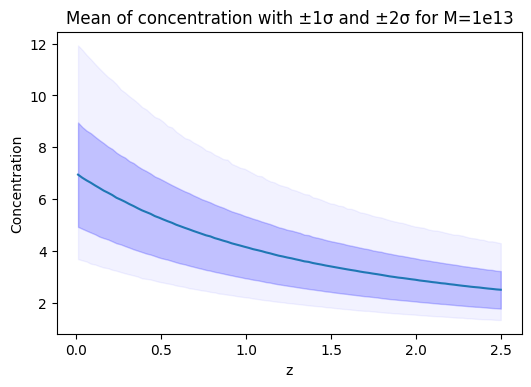

In [88]:
plt.figure(dpi=100)
x = np.linspace(.01, 2.5, 100)
all_concs = []
n=100000
M=1e13
for xi in x:  
    concs = mass_concentration(z=np.ones(n)*xi, m_200=M)
    all_concs.append(concs)
concs = np.array(all_concs)
y = np.mean(concs,axis=1)
lower = np.percentile(concs, 16, axis=1)
upper = np.percentile(concs, 84, axis=1)
lower2 = np.percentile(concs, 2.5, axis=1)
upper2 = np.percentile(concs, 97.5, axis=1)
lower3 = np.percentile(concs, 0.15, axis=1)
upper3 = np.percentile(concs, 99.85, axis=1)
plt.plot(x,y)
plt.fill_between(x, lower, upper, color='b', alpha=.2)
plt.fill_between(x, lower2, upper2, color='b', alpha=.05)

plt.title("Mean of concentration with ±1σ and ±2σ for M=1e"+str(int(np.log10(M))))
plt.xlabel("z")
plt.ylabel("Concentration")

Text(0, 0.5, 'Theta_E')

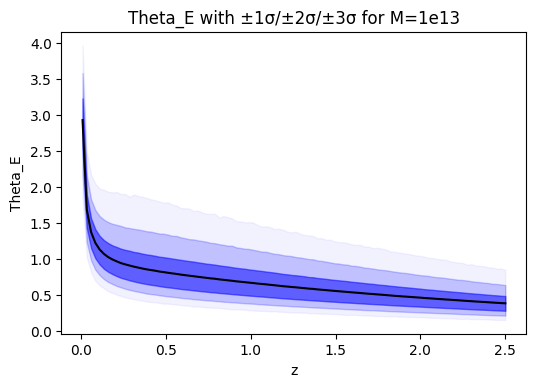

In [89]:
def kfunc(c):
    return c*.01*(M/1e13)**(1/3)*(np.log10(M)-9)/(13-9)
plt.figure(dpi=100)
yT = [theta_E_S(y[i], M, z_lens = x[i], k=kfunc(y[i])) for i in range(len(x))] 
lowerT = [theta_E_S(lower[i], M, z_lens = x[i], k=kfunc(lower[i])) for i in range(len(x))] 
upperT = [theta_E_S(upper[i], M, z_lens = x[i], k=kfunc(upper[i])) for i in range(len(x))] 
lower2T = [theta_E_S(lower2[i], M, z_lens = x[i], k=kfunc(lower2[i])) for i in range(len(x))] 
upper2T = [theta_E_S(upper2[i], M, z_lens = x[i], k=kfunc(upper2[i])) for i in range(len(x))]
lower3T = [theta_E_S(lower3[i], M, z_lens = x[i], k=kfunc(lower3[i])) for i in range(len(x))] 
upper3T = [theta_E_S(upper3[i], M, z_lens = x[i], k=kfunc(upper3[i])) for i in range(len(x))] 

plt.plot(x,yT, color="k")
plt.fill_between(x, lowerT, upperT, color='b', alpha=.5)
plt.fill_between(x, lower2T, upper2T, color='b', alpha=.2)
plt.fill_between(x, lower3T, upper3T, color='b', alpha=.05)


plt.title("Theta_E with ±1σ/±2σ/±3σ for M=1e"+str(int(np.log10(M))))
plt.xlabel("z")
plt.ylabel("Theta_E")

Text(0, 0.5, 'Theta_E')

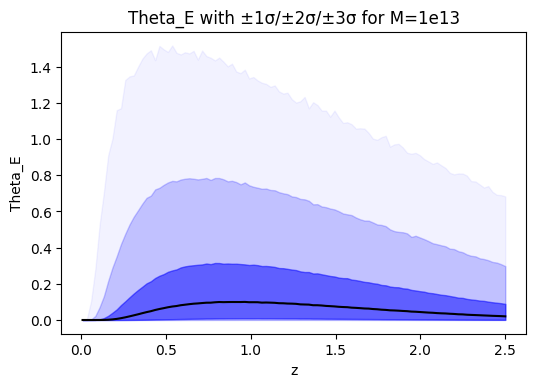

In [68]:
plt.figure(dpi=100)
yT = [theta_E(y[i], M, z_lens = x[i]) for i in range(len(x))] 
lowerT = [theta_E(lower[i], M, z_lens = x[i]) for i in range(len(x))] 
upperT = [theta_E(upper[i], M, z_lens = x[i]) for i in range(len(x))] 
lower2T = [theta_E(lower2[i], M, z_lens = x[i]) for i in range(len(x))] 
upper2T = [theta_E(upper2[i], M, z_lens = x[i]) for i in range(len(x))]
lower3T = [theta_E(lower3[i], M, z_lens = x[i]) for i in range(len(x))] 
upper3T = [theta_E(upper3[i], M, z_lens = x[i]) for i in range(len(x))] 

plt.plot(x,yT, color="k")
plt.fill_between(x, lowerT, upperT, color='b', alpha=.5)
plt.fill_between(x, lower2T, upper2T, color='b', alpha=.2)
plt.fill_between(x, lower3T, upper3T, color='b', alpha=.05)


plt.title("Theta_E with ±1σ/±2σ/±3σ for M=1e"+str(int(np.log10(M))))
plt.xlabel("z")
plt.ylabel("Theta_E")

Text(0, 0.5, 'Theta_E')

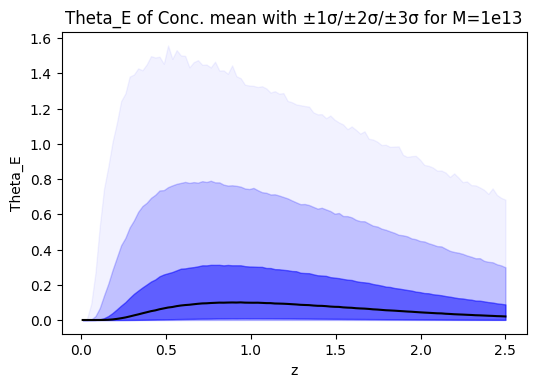

In [17]:
plt.figure(dpi=100)
yT = [theta_E(y[i], M, z_lens = x[i]) for i in range(len(x))] 
lowerT = [theta_E(lower[i], M, z_lens = x[i]) for i in range(len(x))] 
upperT = [theta_E(upper[i], M, z_lens = x[i]) for i in range(len(x))] 
lower2T = [theta_E(lower2[i], M, z_lens = x[i]) for i in range(len(x))] 
upper2T = [theta_E(upper2[i], M, z_lens = x[i]) for i in range(len(x))]
lower3T = [theta_E(lower3[i], M, z_lens = x[i]) for i in range(len(x))] 
upper3T = [theta_E(upper3[i], M, z_lens = x[i]) for i in range(len(x))] 

plt.plot(x,yT, color="k")
plt.fill_between(x, lowerT, upperT, color='b', alpha=.5)
plt.fill_between(x, lower2T, upper2T, color='b', alpha=.2)
plt.fill_between(x, lower3T, upper3T, color='b', alpha=.05)


plt.title("Theta_E of Conc. mean with ±1σ/±2σ/±3σ for M=1e"+str(int(np.log10(M))))
plt.xlabel("z")
plt.ylabel("Theta_E")

Text(0.5, 1.0, 'Einstein Radius vs. Redshift for M=1e12')

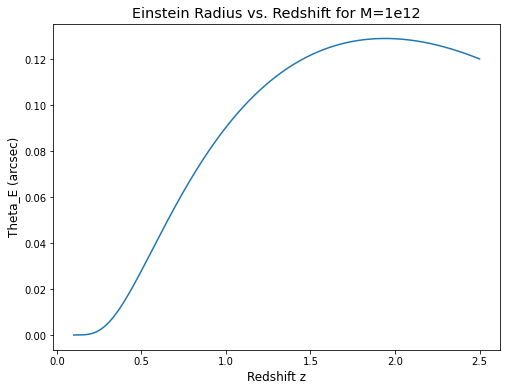

In [36]:
z = np.linspace(.1,2.5, 1000)
y = [theta_E(10, m=1e12, z_lens=zi) for zi in z]
plt.figure(figsize=(8,6))
plt.plot(z, y)
plt.xlabel("Redshift z", fontsize="large")
plt.ylabel("Theta_E (arcsec)", fontsize="large")
plt.title("Einstein Radius vs. Redshift for M=1e12", fontsize="x-large")

Text(0.5, 1.0, 'Einstein Radius vs. Concentration for M=1e13')

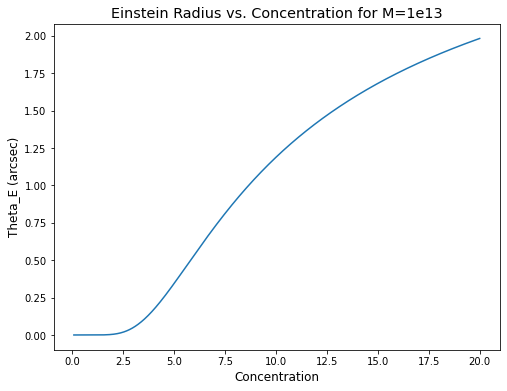

In [294]:
c = np.linspace(.1,20, 1000)
y = [theta_E(ci, m=1e13, z_lens=2.0) for ci in c]
plt.figure(figsize=(8,6))
plt.plot(c, y)
plt.xlabel("Concentration", fontsize="large")
plt.ylabel("Theta_E (arcsec)", fontsize="large")
plt.title("Einstein Radius vs. Concentration for M=1e13", fontsize="x-large")

Text(0.5, 1.0, 'Einstein Radius vs. Concentration for M=1e12')

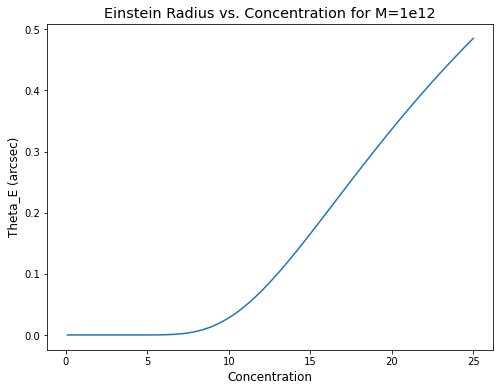

In [295]:
c = np.linspace(.1,25, 100)
y = [theta_E(ci, m=1e12) for ci in c]
plt.figure(figsize=(8,6))
plt.plot(c, y)
plt.xlabel("Concentration", fontsize="large")
plt.ylabel("Theta_E (arcsec)", fontsize="large")
plt.title("Einstein Radius vs. Concentration for M=1e12", fontsize="x-large")

Text(0.5, 1.0, 'Einstein Radius vs. Concentration for M=1e11')

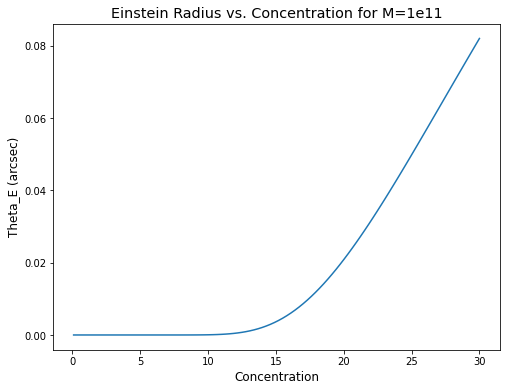

In [296]:
c = np.linspace(.1,30, 100)
y = [theta_E(ci, m=1e11) for ci in c]
plt.figure(figsize=(8,6))
plt.plot(c, y)
plt.xlabel("Concentration", fontsize="large")
plt.ylabel("Theta_E (arcsec)", fontsize="large")
plt.title("Einstein Radius vs. Concentration for M=1e11", fontsize="x-large")

In [14]:
c = np.array([8.600338396803497, 5.807923178862369, 6.772167592056388, 6.431887867041187, 6.026679843030342, 6.049918078525881, 7.04463557336896, 5.465101924265702, 6.562120006642457, 6.0848825025352085, 6.420772558142543, 7.314098794721768, 6.408981790746417, 4.643954280328092, 6.635329109229991, 6.077515439811738, 5.025129141720975, 4.861877877961594, 6.389509309567484, 4.049664627130712, 4.746414137404813, 7.318589691388008, 5.545782134145207, 5.474990802295852, 8.994313627782944, 5.7501732686512605, 6.51601396660827, 5.275279873260657, 5.035377756477923, 9.944589831934653, 7.941938412176677, 6.083091968023943, 7.025480418181718, 5.732894520442441, 3.6364636090002436, 5.558490821598672, 5.705120385450207, 7.422954985988028, 5.497068511276094, 8.098439780329539, 5.639515274874983, 5.30704701079142, 5.579998086223552])
m = np.array([2518549540.810459, 2406757204.3434777, 7165810682.513226, 1480940717.9860225, 7435440107.060641, 1005804125.4366665, 5738269831.953793, 1138393417.018533, 1384403557.1418946, 1020986741.198534, 1190986207.2712352, 4148490859.1591997, 1838893674.6694584, 448526187373.8181, 1475653273.9227102, 1054318694.4010186, 3283567415.885457, 3173241941.556815, 1083362643.5546234, 1313175537.4089806, 172914709277.041, 3039861465.803447, 1110590209.4489496, 1847910739.5508242, 3059873915.4542956, 10194302915.60508, 1064988544.8880589, 1830188453.956525, 19676604020.758137, 1863674523.4104495, 1029853621.6682744, 2739299355.7047615, 5192742410.118269, 1547407631.085157, 1721674500.6602464, 2928591249.497589, 1573322121.9605026, 1700498863.7355068, 4130321658.3029222, 3334342772.9087815, 1573689676.8236043, 1061537042.818328, 7824650010.189928])

c.shape, m.shape

((43,), (43,))

In [15]:
masses[0]

NameError: name 'masses' is not defined

In [16]:
opt.root(lambda x: theta_E(x, m=1e11, z_lens=2.0)-.1, 1).x[0]

28.56086674223219

In [36]:
m13 = [6.572448999749045, 7.761214958065367, 7.333361602576369, 5.8078911748459, 4.9931464865771025, 4.169011245898655, 5.643858521986695, 5.686973044346154, 4.833314775472355, 4.051329502041902, 8.096585997704764, 6.991314651938508, 5.99197784477081, 5.851673377004674, 4.982146886837625, 5.672830847492515, 5.31443539956697, 7.670484808541705, 4.5050618185910105, 3.9525326957966795, 4.650772143963907, 6.545084157868604, 7.33335699175109, 6.418170472983012, 5.889764156141837, 5.127106640540088, 6.066090250535804, 6.469784294009345, 7.675532452402161, 5.439514738699751, 4.842874210849838, 6.48343914374863, 5.826305614739353, 7.251822685481901, 8.084998927768627, 7.35227399967331, 7.673024278049428, 4.7859740245333855, 6.994961859073664, 4.310337478710944, 4.803909915738066, 6.280189072693909, 6.635991391783865, 6.415087113341836, 5.827674142166858, 4.676326846806122, 5.7241457945466125, 4.626121272603917, 4.30054993355524, 5.167746144060842, 8.269267271440485, 6.063457715204693, 4.707162182551747, 4.592985034046608, 3.1186302323587567, 5.100580888781412, 5.240527713888113, 5.2734376762050825, 8.832432723998902, 3.8220253375915463, 6.529540839567605, 4.406964080437301, 4.84058991902844, 7.6055944383793666, 6.843275009197176, 5.3020433526139765, 5.624083874041666, 8.898966756855568, 6.032970087931559, 5.103967949997727, 11.088210646125463, 5.666738365342459, 6.333545592616399, 5.426964069104615, 7.0998034665273755, 4.660995675484095, 4.3666201785517496, 7.417524020735926, 7.032423871551034, 5.522237325001793, 9.357468002600363, 5.570283379205962, 7.812654175662802, 5.516784413049769, 4.506511429266966, 7.261472339308142, 6.014456149708646, 4.85105421273221, 7.769519121346007, 7.570740902627192, 7.22651442182717, 4.576233696715849, 5.907381151021746, 6.327170496446489, 7.476434055282153, 5.155978329427016, 5.294777852761174, 5.635511848130399, 7.872776599688808, 6.443763339925935, 3.940277425561461, 4.7525364079138654, 7.35090442208231, 9.574733040192005, 3.7294002754917943, 6.776238799981883, 8.742067696166654, 5.647251230645596, 8.058296109813782, 3.8723436084772507, 6.28682455379839, 5.279919004415453, 8.865855920779408, 9.125555548004101, 8.233574154752572, 8.598257365336176, 5.398199321897724, 6.6346779098727575, 4.49120677329312, 5.847134591623883, 6.098763650838983, 5.720564034959865, 4.836550976212996, 8.799502925805852, 6.04609701858845, 4.250418417150664, 3.4348826062844897, 7.418015597849091, 9.19216488565292, 7.089872923418144, 6.957402637248077, 6.523959005412573, 6.796505337551826, 6.878196559293422, 4.466245197040509, 5.169746803077382, 7.164083666140759, 7.227122062646023, 6.514570096603084, 5.785314130096681, 5.001468090534946, 6.795612719815862, 6.477330299863143, 6.4829708464414075, 5.171848662971056, 5.634290023978632, 5.945436241194009, 8.511874063106525, 6.301889989254835, 5.806527993523035, 7.118729977100047, 6.227438069087907, 5.758540605277258, 6.471502428635012, 6.4609325603680094, 5.167025024847719, 4.039788982588824, 5.482350394439153, 5.82189176537832, 5.446451315508147, 6.01566731542957, 6.476947715457254, 7.500897058216878, 7.376791701809794, 5.654556416326426, 5.74048621576389, 6.142195434909168, 6.12998351624469, 13.775155057869855, 8.085696653269121, 6.536859602887776, 5.575998201089855, 5.3524447839851, 7.28731569934705, 4.399045629349375, 3.924194574709084, 4.290224135985729, 6.870979964891357, 7.094410804253558, 5.959379756779497, 5.26987162041187, 5.232876062338654, 6.123703768901714, 6.162534035371423, 4.582480546505341, 7.165472079929845, 7.257617893532907, 5.2026532426446845, 6.58906415135613, 4.496037174321182, 7.1014593164079045, 3.9643440524448437, 5.753775654920381, 8.982498488249918, 5.484509948993856, 8.959632625172649, 5.945006769823128, 6.240082997739018, 5.996155477611103, 6.080634849124624, 6.990731112844174, 8.87769962005989, 4.176803689544017, 5.218444851347357, 7.110580072382108, 5.534782621293115, 5.961408935963669, 7.927324845792125, 6.4639434171055425, 7.346374722722091, 4.855210921884329, 8.436475929498526, 4.366486021198116, 7.257593483754872, 5.195862158796315, 4.2133783359579065, 10.11299587796418, 4.777841021133511, 4.591996019038845, 5.292575654195346, 5.4741345089096765, 5.710364403446916, 7.9489525975745945, 5.905574493512789, 5.883439601004791, 5.5503374163563315, 6.460850454908664, 3.7134581882542803, 3.7521218645617798, 3.9214351801505694, 5.277037495049283, 5.144638437902604, 7.544674609843803, 8.779998028617518, 6.59162202282972, 4.910801245805401, 6.488525332483169, 5.647299144588712, 5.941382414331367, 6.659679768324922, 8.149137321530823, 7.266226534820925, 6.698841992814586, 5.21302344626238, 5.868081316651558, 5.789845773667923, 4.462916912181103, 6.983691992414348, 5.97906301699649, 5.73343835326453, 5.759197474643293, 7.228807505018274, 3.987858575406899, 5.200370378984513, 8.003322692971892, 6.258552411695834, 8.550233971675228, 5.092494181925659, 4.591024191341926, 5.6817645912114445, 4.021044836550741, 5.3297329584335404, 3.8473430164587197, 6.609722312487157, 7.303891489623794, 4.785752164417755, 5.692697504746572, 6.4453550257648855, 6.0890050765441535, 5.812403496056731, 4.787085884147733, 5.657394677868123, 6.335089731544929, 6.8707826679303174, 5.982061958972895, 7.841976291190941, 5.699627845328103, 7.679543402099967, 8.942835110035782, 6.276642596867033, 7.471898547431161, 8.047285175242418, 8.335308149039381, 8.296814843115854, 7.16051392946063, 5.671563961988991, 4.79372671744145, 7.544227255039934, 7.458941514938562, 5.698710091675161, 4.681254428224278, 5.541669816287727, 6.32924642986571, 4.084116299180907, 5.476494408759853, 5.353888068266496, 5.60193072952534, 7.527807849290321, 7.673148758765015, 7.395782619358056, 5.916579289005967, 6.744482960006614, 6.021166049727541, 5.3111348860502785, 6.178359964645609, 3.5453184320757414, 5.026409565336921, 5.700308191685215, 6.853749359090596, 4.504689644785167, 5.843251131447058, 4.528288706896425, 6.6727835898335055, 6.758828543140547, 4.946309360446628, 9.40017119978295, 5.485303191156619, 5.9058305032264204, 4.357100986016369, 4.566425836072137, 5.849136919875509, 10.069611076187519, 5.067607005228956, 8.25967606110762, 5.074530933578784, 5.447637703638502, 4.479836854651538, 5.133222640136982, 8.951892173585689, 5.1113969818849405, 7.763876193368215, 5.001087708055628, 6.206873617305261, 5.472380323591081, 7.41832339583699, 6.005899224691719, 8.830347793616927, 5.632942460497951, 6.917933973543771, 3.448819319154466, 7.863083486970496, 5.066377263833936, 6.6742188579493265, 6.034837624605329, 6.932174930261121, 5.894249239174069, 5.145064611780968, 5.882402939355056, 4.911149331771859, 4.482705605194147, 4.851898123150554, 6.329696922026174, 4.085028382165575, 5.576258770354432, 4.640030908026006, 5.8257731367934475, 6.6735525872917965, 4.159300219328268, 7.755091572338239, 6.336857732908303, 5.324552536821741, 5.082677996846373, 5.673881636303791, 4.582004348667494, 5.299128452540543, 5.199796521553819, 4.19997886055226, 4.52062146653043, 4.252431410169317, 7.312144435336477, 3.7659475427077216, 5.363094210840372, 6.183909821202494, 5.907663359504052, 9.136506227642208, 5.55343939275361, 6.575829433311045, 5.337886266222119, 7.954891939515732, 4.653857504706469, 5.3995929486332725, 5.749938085813394, 3.453919835074434, 4.065400778278321, 6.0536970403716115, 4.671736748144375, 7.665636916851897, 5.398478476250889, 5.302865538487589, 6.515041113221043, 7.840186406774782, 5.469464720776743, 4.516442470952274, 6.519219051801318, 5.2344528277333655, 7.342877592236716, 7.806015005451803, 5.253773462788709, 6.984409705036476, 5.070746670329019, 6.810467066830737, 6.952619021184781, 7.102443705154317, 5.762025551977008, 8.021340103775755, 8.056796088445477, 6.322680154780667, 6.00163579282028, 6.810622267856156, 4.456560960617587, 4.429192060524905, 5.305798215737281, 6.779484235288827, 7.482757753771907, 8.16366610138971, 7.4350081227915155, 6.205431215622674, 5.480191613468588, 9.399413925143646, 4.982318434856132, 7.019034666104244, 8.173996100571129, 7.472832368875098, 6.846678154054985, 5.254483416910707, 5.924014025502801, 6.11120814435491, 5.996130136054467, 4.972938602469742, 4.669789122595887, 4.810005097210124, 5.849943917542622, 5.130260644994767, 4.383170148968801, 4.743751732318957, 6.975266956713252, 4.6525234387889824, 4.017068698298924, 6.202217630397893, 2.783756761621478, 4.5924738107732015, 8.144368981556958, 6.143808152082042, 3.609493138159017, 5.767794469155689, 6.441815106393174, 4.5118880084268325, 4.473731506060711, 6.500374496834219, 5.65980413905441, 4.489365092289195, 6.165381367099908, 6.3035544223909605, 6.821732128171925, 7.05715808894759, 6.202285634925793, 4.869257870448184, 4.617513581188135, 6.157857991740082, 5.885158292057044, 6.393957722789822, 8.47684792358129, 6.702013633307053, 6.152906637050996, 5.597245479324369, 4.56440098984399, 7.969049411480771, 4.7166776418322955, 4.396992416094109, 5.5430359346109075, 6.955040463300668, 5.189556621844989, 4.93082271777546, 5.673360148683404, 5.200843311533445, 4.4278372500121, 7.390554132375351, 8.673494411324853, 4.867597594578408, 5.926889351718857, 5.720213146706365, 6.518866770677099, 7.908182956481233, 6.066805509655085, 6.018450542781931, 5.69307709141999, 5.776934731766605, 5.727350212015894, 5.795296303976619, 5.230155157462478, 5.974830054788893, 7.645910478210868, 6.56305278571058, 7.551574245656378, 7.124082982603886, 6.70675902089713, 6.588736751238754, 6.863960793917236, 6.713226312118182, 9.94876365449191, 4.638383269752212, 9.096380296469352, 6.49294793166891, 3.950047328488058, 6.4676370724413035, 6.00856644150763, 5.568852229789706, 7.467269911323355, 7.575834497630421, 6.195902776497755, 5.352233299218868, 5.626228972168099, 9.344041612914552, 4.156762733186575, 4.254531882748537, 6.542535391748877, 4.841349755060914, 6.046115955910983, 4.92193602645575, 4.498857410729383, 4.9673564536999315, 4.957148061618417, 5.1906861765701455, 5.480442022843543, 3.7901305720013148, 6.504223915822665, 8.54743430619297, 6.386788296373022, 6.202833636479937, 5.104927856232455, 5.484833051783484, 4.81971546735265, 6.617405011837006, 4.387163585455764, 6.183581888340613, 6.348491325397626, 5.9148642498456105, 3.5491579619269333, 6.78293797537909, 7.5685069642166045, 4.506795043721116, 5.62539606943349, 5.42626460871995, 6.720794299886937, 7.642391689611645, 4.609473305634713, 5.012025752095436, 3.872536243669436, 6.231726364080296, 6.67712395511456, 5.668336026164275, 6.066037534587953, 7.493746828267597, 5.868393254234098, 5.09285866673879, 4.36283882210948, 5.144131725733766, 9.047377975570527, 4.151951437051823, 6.263391692113128, 3.301870488574982, 6.809068932703637, 8.149190985087142, 8.132226662969767, 4.9566482751329035, 4.749269634348129, 4.8278477877942265, 7.015946259132379, 7.261140494047208, 5.780011637689087, 3.9577452077301514, 5.0544586648192515, 6.028998018329794, 5.703484359480266, 4.570987209287319, 7.193141496024671, 6.355176510373205, 7.012513316595755, 9.643730475949914, 8.29209852028728, 4.181005843776208, 5.871268465223977, 6.164413359075907, 5.282906943846867, 6.045792730599689, 7.601576665549887, 4.94168345659661, 6.276841805816081, 5.718223233657473, 5.929866131232976, 5.1722058986701285, 5.377992951156519, 8.439781088745727, 5.090983756520714, 5.74104213930746, 7.0542518545652, 3.4832047385546154, 6.31413210631659, 6.735785460453168, 5.287981999031179, 4.192762203295013, 6.051777986141716, 4.4520749127894605, 5.845083198182199, 4.771741689018242, 5.444469756767301, 5.171985964420956, 6.6100279772969985, 5.23104850329144, 3.7975734032475787, 6.046523740668583, 9.196041862062954, 5.94046716613968, 3.9010987335838143, 4.094939166691723, 6.3982554056393095, 6.324266305520317, 5.90020772788392, 6.669287892875542, 6.919742748724621, 4.6036584140811385, 5.05692103701713, 5.368225796581769, 6.4785461700208975, 9.05303308257961, 6.056644635656566, 7.362360893491465, 5.99860713709641, 4.662441796438174, 6.297328561730849, 6.039853246027698, 7.760352931141545, 6.90940939398071, 4.706871941611768, 4.571573897563754, 6.630347753286636, 5.021595308600972, 6.965086826008804, 4.562922904950903, 5.821294310303864, 4.138577115409137, 4.731789014348661, 6.086547928634069, 6.867997046468378, 7.134165896701089, 8.480075706998772, 5.053852786822201, 5.104928055052064, 3.6230628733996206, 6.790493673730853, 4.316116319009733, 6.392702856686783, 7.758523862126614, 4.348222382512675, 4.56350673258959, 6.313826744202352, 8.100522468581527, 8.62204044923335, 3.7975773941992665, 6.3238952176103975, 8.747819115147207, 8.512142180800655, 7.5258397278858675, 5.737537771113478, 3.672477766827196, 4.625540265481623, 3.8711101185289527, 4.782528205453921, 8.157222088786627, 4.3604288819589385, 5.342394479107455, 4.417759443226564, 8.364160693604358, 4.27404628972335, 5.898852131040186, 5.32595740494688, 6.269426303278984, 4.056627516855501, 5.712855800460987, 7.522203377103411, 6.692918018464282, 2.9502159315842578, 6.340543814896844, 8.98053842068737, 7.603573920749552, 5.058676604845203, 6.97009289747546, 10.403823759925148, 4.2641826645475795, 4.91439867474023, 5.180622398446976, 6.467176175169007, 6.728518224581569, 7.819541501565017, 6.168620889706498, 5.146300628405881, 7.395890066832365, 7.258389745939273, 6.458701047060792, 4.940743481009031, 5.304042325452542, 4.914898172703982, 5.165618989651452, 5.2577076832911755, 5.7950734658787315, 3.9182673922332922, 5.638354436639881, 8.068660652105407, 4.481078514015751, 7.56133353311551, 4.630242015424421, 5.718797676897059, 5.905064653958282, 5.103768577247773, 4.344736867455664, 3.609501851725757, 5.340452283787354, 3.700572621101404, 8.361751078442332, 7.872459392790485, 6.324254754839234, 4.136007409886593, 5.953795022233356, 5.02231595140352, 3.8635398798206837, 4.314217060303443, 11.934111555616324, 5.14643921205911, 9.18826114172002, 6.7925433094452154, 7.38131362203511, 5.933857729967528, 5.29969187221356, 5.178018273971201, 5.189463530063807, 4.116835252549178, 8.5921754307766, 5.74615916757999, 4.92112348831496, 8.234864764276598, 8.63300555133964, 4.82928066880395, 5.3490674384070145, 5.499192133321368, 8.077159543071636, 5.918617865879481, 3.672729766922958, 6.701549346261483, 6.7957732479296755, 5.77852041925833, 4.4763394600565505, 6.679114946577887, 6.032888080501975, 6.042068131005697, 5.7224379501610985, 5.223269939560564, 8.93218429958035, 8.206778450549225, 4.909496001398894, 4.913022602130478, 4.5447262902747045, 7.09899443871134, 6.634738796143409, 6.141031566812268, 6.151153231534608, 2.847522393677483, 6.849428717637094, 4.75295364997706, 5.909707963081781, 4.410911453271039, 4.568157989785571, 4.273371648512532, 6.328309323127734, 5.329792870926122, 5.933097709688257, 4.433872709529994, 8.285953872228703, 6.676581189349038, 6.395384690397231, 6.326171995723108, 7.276059381178145, 5.148001631695924, 4.354130571845659, 5.733699228849395, 7.260771326719115, 7.53230689493436, 7.081495113980122, 7.562030249896557, 5.352327180762647, 5.463858329767895, 8.039543368436641, 4.318782211970487, 4.250997603582046, 5.554280393577685, 2.7833506411984943, 9.527516943126233, 6.2993830182826915, 6.075178521607284, 6.486060830677266, 5.461114475892554, 6.111575929684504, 5.55938588365217, 7.8314647235272705, 6.699237248735194, 4.570172611815592, 6.711583732016446, 5.681502561825219, 5.613916696768657, 5.649424589674807, 7.021112140800024, 4.306055671405671, 5.46539416216114, 5.304314638971213, 5.239031854698318, 5.878641037318845, 5.63674747508972, 7.0523278745964495, 6.96453976487236, 6.2254407846591215, 7.136272972798369, 5.217172790103524, 4.804672650059288, 4.396967493351196, 5.063642369754865, 5.488728161401151, 5.316732231280319, 3.573490308907905, 5.97798114211804, 6.38313099396973, 6.049306280756376, 5.511591984101654, 3.8293485825876226, 4.195263377648038, 6.502560116205982, 4.390553223948544, 6.960027852663161, 6.397064495497107, 5.621583419009268, 6.529354662422306, 9.053065967028619, 7.844528326551603, 4.942724717096813, 4.737743606890428, 5.033234539679792, 4.694599912454079, 9.141932299744656, 6.402697334743637, 5.985138878457103, 3.3113881744758875, 4.636712528287629, 7.983880408667695, 7.167938300306642, 6.597519666374608, 6.619546924568514, 8.371581576186147, 5.284579433805619, 8.417847756444306, 8.08052970280642, 3.58247842306316, 6.307622285592094, 3.9672707844663204, 8.967811437403835, 6.80029456633758, 7.465024603283209, 5.831704913609504, 3.7672406549544926, 5.686671476772758, 7.664226186584088, 6.393262045751257, 4.673565997054336, 7.30107272343263, 5.189529734789927, 6.064257525578006, 3.9894631723782954, 6.46325139701682, 5.71658769593811, 4.862918028256135, 6.2794011011419695, 5.4361389417269, 6.449410573396067, 4.780174128242764, 6.803240480785217, 5.276254432077281, 5.4636795861251635, 5.202104392633791, 5.419943397422412, 4.285772530729825, 4.488336294566961, 5.719611599896184, 3.4549322172545565, 5.525185604731175, 7.34185455955567, 5.48862767988953, 6.460543704820381, 4.394081581987831, 5.617336131514515, 5.0432373078760016, 5.440750434096501, 5.905677940713443, 5.019844101039136, 6.739017886156984, 5.767727996738351, 3.279124930451025, 4.581011295785975, 7.139127253033599, 6.3114697833600735, 5.414271081045779, 7.155750485551885, 5.371701874822542, 6.405934941093222, 7.667309447071287, 5.086731999462612, 6.894923473410348, 7.6562137942444295, 6.723288599604942, 8.255794446908611, 8.062162992923941, 5.000198802608915, 5.653908537349158, 8.8618143543099, 5.326207641059382, 5.655642401015493, 6.816747825117305, 6.563041374616397, 3.7580036988908523, 5.73894965149925, 4.3490540461960645, 5.456995539799731, 6.049626574617991, 4.637972911767097, 5.225108238692123, 6.333226714826177, 5.7084601036012455, 5.47489894155624, 5.40651086793784, 5.297552989528357, 6.349279256888329, 4.0586760878272585, 5.956961500457487, 5.6837607546456095, 4.203653849938759, 3.7018102009395375, 5.931656403251579, 5.270470548354353, 5.333727149602203, 5.374467934381073, 6.712719528149895, 6.878844096835114, 5.094081694406174, 7.007034837631664, 5.662025316861248, 7.015619077503976, 5.617530056744411, 5.771522061923119, 5.6433614711802, 5.980908524205195, 4.189615142343904, 6.243697974848569, 6.3258888593575096, 4.295454053203403, 9.27851335190948, 7.07782259904379, 5.1375086780592625, 3.6677307927787757, 6.89322053998382, 4.0809868876916555, 8.338515946160856, 7.039212966600094, 10.165006854126231, 6.981697180045088, 5.7573245573869345, 7.412360441946234, 4.918722004510584, 5.2003110729883755, 5.438280692291416, 5.61537120788838, 5.129704150902657, 6.674074390999411, 6.015148556309622, 8.10862083201794, 6.370706551116471, 5.3402810821276345, 6.862650940840667, 5.156237671793874, 10.89828498210461, 11.338715307181632, 6.410501974369802, 6.392974519662597, 7.132333707614252, 6.972277690235642, 4.402195909690334, 8.41614060979226, 4.38055862352008, 6.666513248616686, 6.119331321102477, 7.40136920614605, 5.141867964149436, 5.308530508909225, 5.563721118019595, 5.771482836794125]
m12 = [10.552145596361882, 3.9529426797214313, 5.849650372145761, 10.368191457113305, 5.1456931550077245, 7.319800629614697, 5.766124527459578, 8.594656669609092, 9.815450372398281, 8.236073149503369, 5.99500276695553, 7.962933851805272, 12.539625678422073, 6.608042680413967, 8.370319903155202, 8.14608973549123, 14.391095033771032, 8.79231304430689, 5.1201456606802145, 9.30509278860827, 6.9937324750920045, 5.933267084389364, 6.666929462232291, 9.926437044612516, 8.465326436378406, 5.468551403546703, 5.16978355495022, 4.752262172800117, 6.574784529315808, 6.758331903780524, 5.348873603683898, 7.5293621263575865, 9.064457027788983, 6.6130192030344634, 7.391438298155768, 5.84316969639325, 7.056480942267377, 5.487037626589551, 8.480128526772798, 7.539764907153031, 8.358750144964251, 7.254079158890644, 7.473921310909728, 6.7068352659819555, 9.374184227264264, 5.419706577559134, 10.018626430516385, 5.742001971361056, 4.520042401881741, 7.353073160912834, 7.676294900256134, 9.597649154686527, 5.4947246602465745, 8.19474838385249, 4.600148172832915, 4.779445083818207, 7.912009883240471, 8.4858000035103, 8.619332283504972, 7.895976948283045, 10.583593175622903, 7.823667610455729, 10.97776951967785, 9.082861690589112, 7.309196360998182, 9.042798637091307, 10.656873203650957, 7.956040623836461, 9.77142274789375, 8.093268432661038, 7.543884283352003, 4.8445751390787954, 6.766650719200295, 7.06980759648707, 10.632003609668915, 5.032342936276417, 10.860043274638548, 10.000582947410276, 5.019887083295251, 10.589917637899251, 8.551102372910599, 4.793195702156319, 7.8481283144820475, 6.636322175728171, 6.368803043408788, 6.795131971998247, 8.447881433846284, 8.644257847804571, 7.294579612382914, 10.533625525478152, 4.67425548672485, 8.03756833168545, 5.920581877348634, 13.944790058208158, 9.284376176927235, 5.402400161795919, 9.02662068991086, 5.808090508389813, 7.65415904955673, 8.341383100659735, 7.487929746628672, 10.504367210725853, 5.230595939052344, 6.814907018427986, 7.538956050339146, 9.472273465224328, 6.830575261772046, 8.71668783239187, 6.427189853936399, 7.8433998747426, 7.112225666865441, 6.643751357380776, 6.7005936869875535, 8.777773260857355, 8.264765941025127, 7.843514547644876, 6.637902827580018, 8.056009519549036, 8.43387576909758, 5.679007672817918, 5.523105722091171, 7.271693781993653, 4.145668828506352, 7.801355849715586, 9.82740537351165, 6.577535574367266, 8.77478754929479, 11.289892226520573, 7.517474850572924, 5.267603957570401, 6.069074796071074, 8.891200314400384, 5.027915224964775, 9.134056387621643, 5.108279950705767, 7.461070943540864, 6.09238547992539, 8.82371227422101, 7.323886006702845, 5.503744082334907, 7.349111939181754, 7.382258368965825, 8.10310837874464, 6.100205191980716, 6.20267282259151, 5.010068599260886, 7.5260676417748025, 6.323757685879791, 10.000641844370906, 5.768404844236358, 6.290264900067167, 4.5178535838377245, 8.284383327045736, 10.572518778273299, 12.459831621845222, 7.092344639502446, 12.56684464154385, 10.006271095379963, 4.334642397692482, 9.894032934878503, 5.799417723906901, 7.35984895298526, 7.837006433540962, 7.513364921176022, 6.955746967544889, 7.777662319280522, 7.567642772646108, 7.2411147282005865, 6.723283967111219, 10.207090898112789, 7.420125712059666, 8.708144864290174, 6.5661697561036, 5.406843414557941, 6.21792783494005, 4.839177431572459, 6.597598423432776, 8.022239577066763, 8.154166379591707, 8.03343104207216, 6.157088723132745, 5.570007586627981, 8.20176388069416, 8.489679202795633, 6.690067942434181, 8.805280981612333, 9.34321804158723, 5.085527051988212, 4.7350472284803935, 5.027561376627592, 5.7253516642795095, 7.73915433744645, 8.065102625930187, 9.027716274641941, 11.330207229216535, 6.00202978913613, 7.5575811596418205, 5.775914154828911, 12.683662517194403, 9.805508132575705, 8.630032834713361, 9.768380923734176, 8.839152589010482, 9.539870279163111, 5.903861143995035, 10.562475794264465, 5.234568616049427, 6.986288778439577, 4.988348712410806, 6.495398750844695, 8.57198211353425, 8.793147910756206, 8.374861144378334, 7.918576804461473, 5.241778918943027, 8.35240820725111, 6.6363638185730665, 9.62666945443764, 5.907345126296241, 8.215907352835929, 6.631954009117078, 9.674303828257369, 5.736794054476588, 6.6874628277975035, 7.141185254674673, 4.5733597048478325, 5.119341148548013, 4.8386999458973285, 7.554787181869568, 10.042180589288753, 5.171618982759735, 6.039804160404329, 9.568994400781841, 6.488070709613685, 8.23561961374724, 5.426482564404748, 5.908888903426111, 8.820737778809928, 6.463007415004295, 10.735480860929453, 6.734707947804662, 9.424262348192267, 8.393561167579621, 6.275232330601444, 6.1090783936441335, 7.310310239240852, 8.598059000163342, 8.168666596342806, 8.154123239434599, 5.402793247032758, 8.669563723098838, 4.455378285266023, 6.333853763570243, 6.575857024111352, 7.39086176596993, 7.277993503896438, 6.580524695385146, 4.054110546222801, 4.615206590247447, 7.600254926226053, 5.366123783641113, 7.651092891640858, 6.095343579294839, 4.4638776365274575, 6.096635464278803, 9.929307484599626, 8.003665951399702, 9.088993635487283, 7.983448493264823, 7.6498402823496106, 7.231801621161717, 6.622044265106063, 5.229138218988424, 7.409739533238135, 8.407113846161733, 6.081192163396346, 6.248364602813972, 6.562768392024738, 8.562527031444287, 8.464778413885623, 9.086741206652006, 5.609775720630284, 6.516585323834463, 13.83728898505106, 7.794952472945115, 9.563885068977848, 7.731379941596329, 8.996834796923908, 7.385312660316292, 8.54456254774392, 10.708556916554022, 6.108905669482672, 7.596100769686898, 10.205639236608228, 6.536653880365937, 5.256873226293859, 7.746070983250526, 5.620363817911354, 8.317588901579288, 9.381714177425083, 5.764275352549206, 6.603266840606323, 7.160050636334388, 8.235558204466093, 6.887298856985802, 8.221224566614739, 8.562913003329674, 8.260855349741483, 8.308295168104237, 10.008610019267856, 6.4977636106151495, 6.964800830859915, 8.880816586430724, 8.809361354571084, 6.850997376538883, 5.3146813768579735, 7.634574011128777, 9.184669123276803, 6.983974852948538, 9.368138618879343, 5.529296171627878, 6.155053360114548, 7.729686072406495, 7.2727511491927075, 6.714355039571547, 3.5448097055710694, 8.9973170189867, 9.861150472784763, 5.760268246959796, 8.54253688469903, 7.872051961897572, 6.348982460676982, 5.263753678356953, 6.344970664294852, 9.830760139614933, 9.248528865978903, 7.823039745004344, 8.407911188080938, 7.336744313771026, 7.495462165386952, 7.882198671903207, 8.682781268322108, 9.542676871761461, 5.656122311526448, 8.502480852453315, 5.810682165250913, 10.166671996627482, 6.147073479385462, 5.334807498230517, 6.020088273144281, 12.082528239488584, 12.110019543719014, 5.648393079803049, 5.976431502868333, 7.576125865938658, 4.299549153688325, 5.976384862113979, 5.916314054126642, 5.703729241100246, 9.36922244981195, 9.66059174171777, 7.6806498733280755, 9.060142339506863, 7.162683810250986, 7.122158232658553, 10.482919817889035, 8.283317140373146, 8.567459661257987, 6.526799490903257, 6.901148300141438, 7.917046985829492, 11.990244950259942, 6.70358770906064, 6.777578828600163, 4.833165224683867, 5.240930807102449, 7.9921925576960415, 10.290232592437532, 5.650795972139389, 7.958399609861148, 7.123195876994264, 5.572896345929464, 4.334018230402009, 9.143997291054935, 8.788636917246171, 5.917830392351702, 8.221054630954798, 6.582665904368, 7.347491758690486, 6.851883062649258, 8.96083129197682, 4.348795308260845, 9.052998977383877, 7.814827333903054, 10.764423882658374, 6.598497910196822, 7.472171292579301, 7.177730717703853, 6.690900988845495, 5.789899616711474, 8.381776034218916, 8.2341973652982, 9.04292122480258, 7.047421190733682, 6.770239629423995, 5.9753221761660305, 7.854341591702894, 7.476059216407291, 7.81420358909065, 8.233333238099092, 5.563939843480732, 5.611140939566631, 8.352833059278595, 7.393722171510403, 8.553243890827465, 6.602029052500317, 6.069717686705313, 9.652658048057035, 6.538565314643128, 8.988393928207127, 7.551319927413813, 9.18173930652388, 6.665586250865664, 6.3024585158799455, 9.605620381318193, 7.6984032336563955, 4.849472541316682, 6.411781855852957, 10.939028696205925, 6.616634579707125, 8.491442539846606, 8.01326302840925, 5.438806357875782, 7.689095882429854, 6.695535659335408, 5.736450324366094, 9.516081425963474, 7.395571166834485, 7.591030280956647, 12.066723782368724, 9.248401766541612, 8.829511789119419, 8.475660720003672, 7.854170496726424, 5.808139452907691, 7.6268556850793265, 6.187417207647857, 5.834841067967399, 7.963356825440165, 4.907854406574552, 7.764695706220481, 6.968701810405434, 11.195397056738317, 5.39961300818972, 6.590562907523849, 6.967951480793426, 8.563623430502878, 8.02254257665204, 6.32856994033398, 9.113815781802298, 5.276869289029852, 7.157784727090154, 6.930347269844207, 8.319735801869035, 7.148729510214544, 8.02575759824085, 8.34940522534806, 4.634892848527609, 8.90170604630149, 8.970247854877393, 6.845965779874799, 7.7423190919096445, 7.082317415630747, 6.988348914325869, 8.173948051788077, 5.601543046584087, 4.251305316643631, 6.435126562037748, 8.599295560721249, 8.131679849540983, 5.039047221087254, 7.480661270703649, 4.972849123787681, 6.353860494554285, 5.843274734334982, 7.780323292606232, 11.313142292656059, 8.88615690339178, 6.837513786789355, 6.69356063791969, 6.599158216062948, 5.5584973581626445, 8.310640476026702, 9.724785501551684, 7.511769421959907, 6.052040599755092, 4.349961425206066, 5.91773525786608, 6.681246230667918, 12.140324205295995, 7.893247493776042, 5.432757747716613, 7.761255006196128, 11.386137297727915, 8.904656161297497, 10.93386887585322, 5.831264502452264, 10.003622448814522, 6.965161850762062, 5.496719631102713, 4.417749748575922, 5.60951098629119, 6.7916715921185284, 5.315478076179137, 8.674650719627525, 8.716708184195122, 6.351269637831837, 6.905070535402765, 8.913411732584105, 4.701374509388321, 6.081950851638381, 5.662124651340521, 8.115528543879792, 7.015753044612541, 6.654469239513844, 5.352270005441297, 6.078139217215831, 5.751269766548339, 8.34403008601428, 8.180072966893963, 5.242084923975992, 11.234234034536936, 7.999780091727013, 7.875318215891655, 12.48880448246917, 5.805685236225465, 5.957511696275248, 5.8707947689092785, 6.79142447218801, 7.092406055532111, 9.792933612946335, 8.258022141835138, 6.687944635206764, 6.913459867129719, 11.328197476215205, 10.129560420823118, 6.135570391579789, 6.893564511603112, 8.478085787163849, 7.430890639847443, 11.095410751706183, 7.50772811019927, 6.759282084827588, 7.422381600746616, 6.430738582147771, 5.135082151236142, 6.432276523670017, 7.643795723474664, 6.046152373239257, 8.398095387795241, 8.553621943856696, 9.123544247505574, 11.997803239503178, 6.005100963387933, 9.008292171237368, 6.632180420421649, 6.124728465882205, 8.082712759490997, 10.38626095052859, 7.583221586916844, 4.820895635430448, 8.212321362377843, 10.094594349763085, 11.799325986021893, 8.00792758905155, 6.257792680397997, 8.803969906663742, 7.84645318413986, 10.944760610881975, 6.213149831180268, 5.135887934330986, 8.815409341521903, 5.30470276946211, 6.294440907850736, 8.266444355382966, 7.104710326520517, 13.720611210331365, 10.176860731855424, 7.136560141366625, 8.67367093102347, 6.8193928792101115, 6.621469437316208, 8.075126669966226, 6.380941671726409, 4.7246489734237045, 6.4533535601837295, 6.90485434739613, 7.5720517266446885, 8.473330184598726, 6.15545468055528, 9.077311384083444, 6.6284580822339345, 8.746177786236666, 4.609361764467121, 6.765959773640727, 7.851151911419944, 10.616026625311775, 5.671410007445875, 6.961827280729511, 5.557158480681753, 5.581468016806682, 8.45221023446053, 7.516700418771198, 7.6512440875944145, 8.67329228575875, 7.181999564489525, 9.075628538005873, 6.334294513345187, 8.69185444064791, 6.432725043487273, 5.679874360854108, 9.199407065682214, 7.336259395293123, 7.222998676193606, 7.706210893496753, 7.918319902805861, 6.21855883226957, 8.231447963915244, 6.709111634763805, 4.746683292210545, 7.30903947655769, 9.568109644045073, 6.732224603564239, 7.7262236882392, 6.850587869798275, 8.696194428772788, 9.061892346761391, 4.773731556066658, 7.504025952761355, 5.755516564245409, 6.695969625043892, 5.476707333392779, 7.723320211490136, 7.590164085488693, 6.818327500104068, 7.922587205277034, 13.178898745145824, 6.064055932080323, 5.287358790167503, 8.273208503627624, 4.856204031698922, 8.618424813013961, 4.719325726607303, 7.588573667657842, 6.7733313954966485, 6.531557916317664, 6.881105449892259, 8.946463891104301, 8.715909095344003, 6.070816316356633, 10.35794880095355, 6.104086878567385, 6.407883802101237, 8.941634597451257, 9.611353293944603, 7.572942448657594, 8.536444978107617, 7.183871807839553, 8.079212019848898, 7.86423393494355, 9.680007916723394, 9.561038923695381, 6.052068110545099, 5.299201081491354, 3.9428125134915306, 7.945489931952402, 7.581584899426065, 6.767034528158536, 7.438755172690851, 7.139126227907871, 6.5951193166944035, 7.398649680594715, 6.980238353453951, 8.683194829190658, 10.851700052249742, 10.399277212838038, 6.423690832389471, 8.419378950229126, 8.232156256344666, 5.493502280757173, 9.586261710237018, 5.0438506708769, 4.477079542539491, 6.3997960361825905, 6.208477298663898, 4.279435600831017, 5.397929536914649, 8.578582790525049, 5.766930563809433, 4.582986427009619, 8.678043397688986, 9.91407035334573, 6.876581331821144, 7.66446519864805, 8.190367345394057, 5.343648125479931, 6.854154676110944, 6.135536462340438, 9.67203049971135, 8.803846714428257, 5.438308940734038, 6.700115613495114, 6.733468553931848, 6.80985015380045, 5.049624951524451, 7.103529270367178, 8.913418499223784, 8.65533910847665, 5.3520482452292555, 8.126516534191358, 5.089601796877783, 7.244971086894457, 7.179652470048761, 7.808713307577862, 9.255239021382774, 5.109001390537683, 7.726241901374475, 11.169849665691153, 8.230936844744946, 6.618548767471251, 4.1950510557505885, 7.949736345464164, 7.46727244848032, 8.293903383307992, 6.094370388854228, 7.645211149965715, 6.612511524278994, 11.80889633552495, 6.112518704029597, 6.517975054351434, 8.78664863866084, 7.5090765698497846, 4.840853383839739, 8.818437984625062, 6.648690975609497, 8.511960780121443, 6.41283501077568, 9.076241299994456, 7.2862485003209825, 10.670052541172808, 7.123216293720933, 8.29531593128604, 5.765199882954461, 8.803935032092635, 7.0844733982068355, 5.9186149200602, 7.732110502036823, 7.77936742388717, 6.0482336578254685, 7.460699928945567, 7.78656731279417, 7.643293420620214, 7.143635529646694, 6.838350229691565, 8.676302852010137, 8.419743335379412, 5.422129386008136, 5.953221320378417, 8.855735525589052, 8.266608798383029, 6.7667473005616285, 9.10739224801026, 5.832309221433284, 8.088958938053093, 6.625387892220169, 8.630072901260382, 7.252356159402604, 5.800828558199841, 5.4677138573270465, 5.730572773521639, 6.728979501905376, 7.72175533944518, 7.064632217099575, 6.292744008875984, 5.8029427749366365, 8.509348853651485, 7.347916318318699, 6.315536212902306, 6.867927788141609, 6.670205331413981, 5.600715472507124, 6.037325663681665, 8.677412361642078, 7.204926786186227, 7.437832785294731, 6.682808355207528, 6.46547467714395, 8.389946495749557, 8.366223905727079, 6.196237266706042, 6.3506539457983635, 7.2158422371545825, 11.635189987855043, 7.121957096941828, 6.468274608035967, 4.736175263603617, 5.743436714858449, 9.633239566653254, 7.345831248797639, 4.622665330904772, 6.467020194154217, 7.7581074903876095, 6.861274099136806, 8.76056999457177, 7.896321432639352, 6.654199304456408, 9.860190203856199, 7.464487253061502, 5.807203765267578, 3.8124915372318897, 10.571078749230733, 9.347337988747759, 8.199979059968717, 8.535275839637897, 6.963663463200203, 6.3545325952775, 9.72760822200965, 6.946029781672057, 9.492202718513846, 5.83288176621972, 8.404623142178679, 6.524077544279935, 7.697783072663946, 7.136879688493306, 9.790498260448217, 10.243671474602811, 8.539700716138249, 4.67903223234507, 8.130970791142664, 6.371130111463529, 7.585466081878536, 6.9159024757353915, 5.943424475332463, 7.302539142451265, 5.891176531199567, 8.864928408265284, 7.082805094853936, 6.636656452328491, 7.2470828879472515, 10.142323525881, 9.062346491032281, 4.660599942065145, 4.760875921525075, 6.017425384004052, 6.363269653381432, 5.432960787390623, 6.779795331600665, 5.393907192071194, 7.6865270662729985, 7.9265802266049095, 5.657827188440665, 8.435447210407748, 6.470773229140085, 6.588634582840009, 8.913221094254395, 7.780202731190478, 7.96676620484885, 10.031350726244986, 7.762635353281343, 4.867415332985917, 7.14034046424078, 9.14331321192247, 7.043271432982603, 8.452745373185364, 5.423054411631108, 8.838667997484203, 8.741118902297098, 5.456680824650365, 6.425045452745622, 5.727174492936464, 10.398365214193655, 6.435398267868629, 8.73914494813765, 6.253134050035517, 8.954669920971089, 5.755225744315159, 7.139300925382542, 5.178681224157811, 10.70855162265681, 5.690803488943595, 6.281115777305209, 6.277919342286828, 4.567256160799751, 9.113448218429225, 6.3379724882313795, 5.159307854816718, 5.672746902814168, 5.429850517533591, 5.698989800692734, 5.946814901267742, 6.805517441713942, 7.457819188575908, 4.180112998834794, 11.293746035905256, 7.709602861936176, 7.5862724079423325, 6.791715434946146, 4.590217825631688, 6.201006398601294, 9.203470524754003, 5.810616398833468, 6.2156336119476325, 8.148482549261114, 11.127736609680005, 9.697670085158661, 6.443935574473135, 5.748218136076469, 9.031225040026806, 5.07484955728345, 6.700777380162907, 7.38189609549516, 5.408479982774803, 8.920685167602928, 7.380335606157228, 12.772470940403185, 6.211052007551874, 5.253144377704639, 8.209269830381686, 8.917522298408837, 6.964278726448191, 6.800916249185344, 5.787655113080205, 8.858496955947665, 9.167334051314107, 7.669461497063108, 4.555679685294226, 7.85366494063678, 6.833687724255503, 8.425103771395792, 6.389291964914696, 7.649416127020121, 9.736858832867332, 13.105310045637118, 8.625456934342138, 3.9447965714050017, 7.756793935878527, 7.9692553308709035, 8.781587079469274, 6.7282183668263755, 5.715362862077782, 6.81310540858252, 5.811347905307777, 7.184477012466591, 7.389628544719356, 9.413967212485028, 7.5464168153217015, 6.2558630216556805, 6.083826998182029, 6.276727283579746, 8.88847482407484, 6.501554158902077, 5.946786900800377, 6.825014653595025, 6.498060355257995, 7.792655630179196, 10.35330234329714, 5.683494492696043, 10.500192491663128, 6.840464223307689, 6.404419140824141, 5.560941594816749, 6.478402864787566, 7.984890080376404, 7.3239088935256085, 8.214339365465644, 9.604038360302413, 6.6669144250363805, 4.401001833924534, 6.171139495577099, 7.213810797422594, 10.474738997126122, 7.4029701115211495, 5.296203352199916, 6.679206431014528, 7.758156853061177, 7.013205176621908, 5.104012152262178, 5.778009310623359, 7.71948252034874, 8.00707933583917, 5.731340527881967, 5.456578990694483, 4.534356104441611, 7.3900049650739215, 5.150152024584784, 5.772270250903907, 9.603358635609714, 8.174829811649584, 8.843121561134398, 5.649632348529195]
m11 = [6.734964558472877, 8.523953270867962, 7.325576019040392, 9.354383087724141, 8.730918487745571, 9.893889175778103, 7.3018344096971415, 11.141616979774984, 8.158443723690764, 8.493323831813953, 7.611220736696016, 8.144340797789152, 9.73474063743717, 9.315080653245431, 7.160407587404996, 8.430654419861572, 12.18158705345765, 14.825795077858018, 9.724587756612966, 8.810277111681485, 10.569887689310846, 6.0611921626027225, 8.019862767148988, 13.889985864897834, 5.794142022340026, 8.621743506203277, 6.959680039245289, 7.823459789388408, 10.622543806535141, 9.326008351401336, 8.692309844633446, 6.819890644246256, 7.65070318582699, 7.1352951200406425, 7.527277861270552, 9.301572840153726, 7.357941042293356, 8.126740886822553, 10.276387376761972, 6.900115601084427, 9.702602657313207, 13.641251779037146, 6.213356637440469, 11.640312879181918, 8.438663807611043, 8.19012918849357, 12.185338035260731, 10.938780698172923, 4.768618588343831, 6.779047538746213, 8.147383697211431, 7.432970221261878, 5.640239356376393, 8.225722847013888, 9.4268735625382, 8.62007256164317, 5.706991328105141, 10.22507962880498, 8.75057979853928, 14.721106375193965, 9.989490031400681, 5.604722592214043, 8.70948574781523, 8.832346843659717, 10.210838645989405, 9.505780011484376, 7.398332924780129, 3.1797485078610572, 7.865099951729189, 7.042928732535731, 8.93480449702463, 12.887473068676139, 6.341045382936919, 10.087341468041284, 7.479779225080908, 8.226332852112119, 7.7829550993121375, 8.047753785745938, 10.35984719949671, 8.321338313698144, 7.847232478398306, 8.157717040996955, 8.873330121349227, 13.04745539294165, 10.633981618603741, 7.657038126892839, 11.604680792084832, 10.160996312176975, 6.779904011996211, 9.904384174220718, 7.578541657892185, 6.916201169588171, 7.6622330342656575, 9.807912081257134, 7.469076124482557, 7.785163811428884, 7.466199886738828, 9.549194407824112, 7.462805092272153, 6.1805602639277195, 8.961390501757991, 11.480108862266958, 5.49561160910351, 10.009870144015402, 9.699529072805824, 8.934716164544628, 5.633887363722178, 9.469967622959212, 11.201563279197032, 10.074125212822299, 8.89103427297264, 9.779688506919868, 4.254979769138111, 8.091187414841963, 10.244881280232049, 10.272559202202395, 8.930913414338754, 9.656398765164859, 9.106919820027278, 10.236824435517944, 10.446808128407099, 6.901194714878375, 12.418399034880029, 8.123242752231649, 11.83846093258217, 11.514102322901211, 12.50383336374853, 7.757153047914324, 8.39289737044507, 12.307079519362249, 9.636242431280241, 7.889905001251444, 9.5741419658872, 8.761463421330975, 8.41737832565586, 5.722367611990244, 6.417395879749328, 7.885591846571761, 7.875667134982164, 11.695953042020873, 6.848525078641649, 5.996498299621928, 9.878843912635142, 10.630696756219745, 8.696559268701103, 9.470002165336393, 7.228747392738728, 8.832939116346218, 7.057054528124239, 7.627667748359727, 9.555046161005691, 8.665725175965962, 7.375226274034586, 6.292681493426758, 8.245277123110068, 14.553480051005538, 8.24454215191483, 8.409034491679453, 13.668851686503181, 12.528751616617182, 7.845495085859046, 8.000548177761772, 10.134110550568638, 9.36546453041919, 7.890112703553949, 6.865904266285429, 8.475047626337991, 9.428173149230433, 7.372385311071287, 7.831984414465225, 12.552952353979757, 9.1536859943882, 7.274768440849112, 9.583596372410206, 11.349520696433444, 7.366510171247844, 9.179023643337409, 10.411853702965606, 10.44475277010368, 6.1075155810144475, 6.988845192712103, 7.164362719220589, 7.02372976636645, 6.268845095435691, 9.296187627776437, 7.563009181699163, 9.049473294965672, 8.55798206159904, 6.437582637882427, 6.456328675973751, 9.522267228726953, 8.59324713311072, 6.113537854738561, 9.136561866175539, 7.99351315906102, 6.163870462139371, 10.371078367046616, 9.004634225147376, 9.112287646977922, 8.638020602610863, 6.624292859554542, 8.061230449893015, 9.079451277646633, 10.223494932733942, 5.940090554162621, 9.755223696438291, 7.719622472010761, 7.504744876022983, 6.125563229238582, 7.610192723993092, 8.857407018849386, 6.365058424760264, 7.712616834223553, 6.525384861308143, 12.807408603457445, 10.3013888588603, 7.128343030674008, 8.26567995823172, 9.181551151326095, 9.121110832604359, 9.894649455303261, 11.465157258738286, 10.174766416305477, 6.891949566767458, 8.591409483352624, 7.679952123587289, 10.166666226620956, 11.49997203281661, 9.214487099037498, 7.94319276596973, 5.679781382848979, 6.576903586123254, 7.727119668251059, 7.701046030277339, 4.818193919937157, 9.69952636898786, 10.161098545848812, 6.850754629522472, 14.844893192957286, 9.983928678160332, 12.834207703150703, 5.947527525153021, 12.97607494191062, 11.703777935934038, 6.610406591379102, 6.645458412851288, 8.9907869858877, 7.186502242332753, 9.959973918110267, 7.164494867343224, 6.969703974043538, 9.666324943700657, 8.233693984712618, 6.61688793978017, 6.043621570432805, 12.76560861357467, 8.076327807406244, 6.016594339330939, 5.492790244959315, 8.052055071846146, 6.233661909573843, 8.543797700665284, 8.876123645206656, 7.110330006032518, 8.216185610019155, 8.353290921033034, 6.974697650225228, 12.233890866172377, 8.93173795222615, 10.514080011125122, 12.182600820906174, 8.331179822124971, 8.997374396345414, 11.257183669668793, 7.009543473513302, 7.503024687077396, 10.765318034544633, 11.792750635249092, 7.32430232472659, 11.877649919687634, 7.036517075165918, 6.7716165419076395, 6.555714200536198, 8.42446881805965, 10.209654699192392, 7.870310351423148, 7.259929980641505, 12.816363627871521, 7.2879983999828255, 14.223779571620982, 9.17823714846988, 7.980135004918163, 6.871800029745954, 7.269356640204095, 7.525713489772341, 7.662075977410396, 10.042206457553197, 7.574843765235972, 6.864480875656531, 10.452949632761731, 11.07889510882563, 6.519772136154258, 7.362130279414096, 9.062799203041868, 7.898433155845801, 10.763899690052861, 7.738033659923922, 8.48969025170871, 13.848948968853117, 11.881990393031154, 6.115449246464808, 6.392431461971266, 8.588956308374874, 6.266882371135479, 8.185438429528928, 6.338963000656613, 10.909140276752641, 6.067061654158748, 6.952670070814301, 8.825707210157878, 8.230673928821517, 8.147081650263857, 7.289274274534916, 5.126611459145439, 9.222240273623648, 9.275932306886935, 9.642963237577725, 7.439492220112246, 11.123016387807557, 7.666018561417783, 10.499055956018108, 10.302677065388462, 8.691169839412703, 6.352076234078756, 5.4427150831351705, 9.554150321845295, 9.299567570182056, 12.631012894004142, 10.266077150507057, 6.406858006944311, 7.55096909456006, 13.684877763905755, 8.101653776990611, 8.122047010059054, 6.303157438144276, 6.465759331904521, 8.664109115382944, 7.544974524736089, 7.424187216275288, 7.1524128340766415, 8.412474323688535, 10.82546895094817, 10.07405193719124, 7.21697724105238, 6.864904992086794, 6.807261404627836, 8.974946128366296, 10.82779142846398, 11.061302178235364, 11.05522374016103, 9.31992979364874, 12.387460011060044, 8.043541978234591, 9.399439204207011, 8.43201992034557, 9.163366678087915, 10.147039227029914, 7.8399904775899225, 10.714543346030833, 11.679394745893351, 5.357981818862149, 11.774569983649585, 7.893314444561656, 6.818865459432068, 7.968344821706959, 8.520385483715158, 10.504409657024697, 6.3384222937071035, 14.798632487191885, 12.15465862756556, 9.543270304039428, 7.667846196595429, 10.285694239250601, 5.721538351294194, 11.608004851992298, 15.207223609568851, 9.23335170076831, 6.56674759683543, 11.925618639826926, 5.294356579313815, 8.861577030077454, 9.685098917888926, 8.889515401978759, 7.459442968423147, 9.562647148712438, 8.530728308011314, 8.783971265096648, 6.761831878662399, 9.06474760787796, 8.791374169270648, 7.464284942176376, 7.006477083040952, 7.170443286530844, 13.44852044748106, 8.700519658388686, 9.876051958860348, 8.085220400497844, 9.919486011807006, 7.201715625674937, 10.296385215693615, 7.562047638946832, 9.651700796117227, 11.452846936073042, 7.804115665549481, 7.707593384026286, 7.578059432801704, 12.135144789866617, 8.562087699381548, 10.902803986227788, 9.288947347048667, 7.0947988456342275, 8.976371690529502, 7.888326762175054, 9.187994128851997, 8.99380577511214, 10.77151360014157, 7.214715495141124, 8.958550668492025, 11.887091898754864, 12.154835610425557, 7.214753702640161, 4.955894658263275, 10.646721874811115, 7.986272265969669, 12.465655307535227, 8.841075996312009, 10.579075043503202, 6.955659215169641, 8.770281264792125, 8.944493553225133, 8.394720380034443, 9.231376405562038, 8.106098105035395, 9.421864647851006, 10.550470988436105, 6.508912578511269, 7.11152304769183, 8.066401228665258, 7.767878768521013, 10.858875025984615, 6.943058990658968, 8.379506846846846, 9.472907247484278, 11.813023453040826, 7.7590150179796575, 8.01356523266805, 8.622636456933687, 7.041776686383631, 10.737662013797168, 8.401182088903878, 9.155089692875867, 6.402947050281353, 6.078113032821949, 10.474099229120752, 10.332108896681063, 10.11049939181283, 10.20344167496185, 9.027538797236273, 5.408314346353158, 11.365748000358371, 7.97994277130755, 8.857190606674298, 8.302603015620175, 11.85239736143286, 9.622199866401699, 9.264937558964268, 9.234757717441365, 8.855751725262122, 6.367248479030776, 8.849630860459275, 6.367306416108507, 7.42433195285385, 8.419541298602267, 8.595972482024274, 7.152751450591577, 7.754678580429675, 6.286780040681356, 7.151598461085661, 10.759930286820527, 7.324816123611272, 5.795841598465875, 8.89513454086717, 6.805721292309535, 7.00990967739824, 8.365709634767422, 6.3553512490030615, 6.479408541748701, 7.865727892567151, 10.957157359558357, 7.55999416844992, 6.11942153610907, 13.637473866135776, 9.255216401098934, 8.655071725206788, 6.171747545275917, 8.68117124481946, 9.000289302311515, 10.063119558175087, 8.518416704900428, 8.028699045184883, 9.679444749106283, 9.303482229600744, 8.645501324893102, 8.525613012571986, 7.91672125403244, 7.47449310589069, 5.376191746523857, 8.028403868262355, 7.717672988898428, 13.031559785874538, 6.111104010196804, 9.502220361268202, 6.742559960361525, 10.963975160062672, 6.83063156334648, 7.859392237729574, 6.694086624488714, 8.435894153326329, 9.913107806810762, 8.71947340258687, 8.415251556840893, 8.633335742093733, 5.53031759392495, 10.493678933134504, 12.336443245838563, 8.846492100906403, 11.098564887170985, 7.672783552057943, 6.429070762223426, 6.191783608279357, 8.782567675825039, 9.269863809746816, 10.182968966978338, 7.527335795606486, 9.598431060245183, 8.855769446855632, 7.346479846204854, 7.519590287532783, 6.415138513154812, 9.4148328141926, 10.270383479617932, 11.31057548490826, 5.873356657796115, 8.655497033935104, 6.2569284981446565, 10.276780687954497, 9.697179167955687, 6.483601850387206, 8.245336842151726, 8.01496716801397, 9.379063573610043, 8.039902520696662, 8.658461198915274, 12.564202680699584, 6.191378983726791, 6.214709304786491, 8.642991212980558, 8.829293550690778, 8.535282522054414, 7.6409874054907725, 9.84197437257323, 9.969687090994505, 12.526428632411424, 6.343658395660711, 8.81492937014479, 7.137523295547115, 8.183807270874388, 7.472889533372299, 6.784496048353926, 8.727157783757676, 7.190758069128653, 8.221954951665039, 7.744391459716957, 9.006585731971967, 9.235092805380473, 10.489903832564256, 8.168741007706291, 6.752082135864337, 5.642314078315225, 7.595729271097495, 4.445280909531543, 7.205893683386554, 13.247661988967268, 5.411862100951997, 8.394718386666629, 7.380419224554381, 8.835529914120295, 8.270100221137232, 10.212820961981011, 7.322625193511065, 12.893974688586646, 11.36814701902088, 6.016186685203439, 9.632221175267068, 10.825866201507635, 7.690193354641981, 8.911164345123481, 6.179635625712019, 9.809866685628444, 7.066586120129556, 9.410736201833377, 5.7113564325705655, 8.490195457956164, 12.09813778450737, 7.347036221472233, 7.000676470719803, 10.12009754876307, 10.29797842132, 8.390555184043512, 6.70344612693438, 12.895316845726027, 12.143235056216719, 8.830668392245274, 7.233016777423541, 12.526166322667894, 6.893349562308512, 7.365219442873744, 6.936724576319738, 10.615604557946659, 5.585384789882747, 10.44018450387428, 7.8489929311044015, 10.205668334621503, 8.803368541483126, 6.534416268205094, 8.60064221570885, 8.019772884600586, 8.757447656535813, 5.43622113763514, 9.496324596156061, 7.590506818908973, 9.88926486374479, 11.82478741595564, 11.706602924232675, 9.844659954734567, 8.708180429805502, 9.935745073224382, 11.45909218731711, 9.481744131613109, 10.526009105274579, 9.32572526888167, 6.350142923545101, 7.44418023234789, 9.186539082273175, 10.022467994831793, 6.1687580090303085, 7.698815605109491, 8.261105361950854, 6.374894299217001, 8.252818684534926, 8.386613921330571, 6.572976389886386, 13.963986594370278, 7.438005644820714, 8.116662916220426, 10.460206325055484, 7.806698117256069, 6.353295269369051, 8.223568951176432, 12.83135883278055, 11.297624216292002, 7.357452354491305, 9.016757563419779, 5.858159020971937, 8.882831519854781, 7.325126338205187, 12.550907172131838, 6.80462018335403, 8.055083497904818, 12.218900792418458, 7.356057336302424, 9.292020455421191, 7.063443818580481, 7.82250311459373, 8.218400349063247, 10.087773180072949, 5.283865558477892, 6.536893830290687, 7.182380556401052, 8.01383723450273, 9.506326265723294, 12.731594125225959, 7.510053701220944, 6.521433486844224, 10.217644442891643, 7.568064765750728, 7.70656651266881, 9.197523688578988, 6.823428389871122, 9.983575418834853, 10.401025260248032, 5.772094804845947, 9.341573436568908, 8.786082592176674, 9.672462336135208, 6.584506616272558, 8.21883216542364, 9.20604145514904, 8.542503283788598, 10.255527888120051, 9.280879138441188, 6.257341780487847, 9.352743097462465, 9.797270799566972, 7.774398628822674, 7.409505954353943, 7.0618710655013, 15.233887592951746, 8.957466223623673, 11.683865817790126, 8.062884742215376, 7.869608276072133, 6.964323825079935, 7.775383160650403, 9.52296270950559, 8.00421173496536, 5.2766232289455335, 5.972932950224058, 10.88023391702407, 7.566900661825231, 7.768035549101055, 9.294910855416335, 7.415175636895356, 9.765757308797214, 7.89969413060543, 8.166548260618688, 8.011138153138289, 8.838257479952167, 9.925171563834592, 6.780300321597613, 8.693122997262034, 9.759245547409627, 10.216278524731791, 7.15009847331495, 7.230806355175201, 12.471603784986568, 6.986211729514485, 9.30555214197646, 7.057066622528437, 8.837783824660809, 7.639432336412987, 12.387948752692115, 7.877467117800183, 7.667304505717553, 6.05163681866629, 9.257294325016444, 8.994516972535799, 5.909676150726816, 5.683326777755905, 7.5801652705083855, 9.919798721474203, 11.462693010714338, 6.472736239000202, 7.276347498566186, 8.066005680350003, 6.53547539223327, 6.335189388613044, 10.425239919530881, 7.935684902575884, 8.61112833488088, 10.227336090255196, 10.76249035010012, 8.689637675656979, 7.187938257326435, 8.951292596721252, 8.805282294005764, 8.39963072875243, 8.48102671165832, 9.185046839149821, 9.576288940564202, 5.085587373688136, 8.321654148105843, 8.05172137979076, 10.511563976728832, 6.452031050318807, 8.825572960447984, 7.573047228434842, 3.6409317687731813, 7.750164121563181, 10.08321454970124, 6.529723401819198, 5.181845975168582, 7.3109770508363905, 6.351150150614622, 7.160897583384918, 7.3730960099064, 8.407163886657322, 5.617362488356076, 8.080201633160652, 8.766309658984891, 9.913830283357365, 9.067830966602418, 9.937788692797719, 6.182758648079018, 8.387144890135815, 9.808213793264375, 10.254277264470705, 7.092824538590771, 7.916486248563768, 16.658254966212844, 7.8008230857983225, 8.12706896956987, 7.8655129668518935, 7.116816392468978, 9.12162887109402, 9.330507968598885, 8.289369661934218, 7.017604024191894, 9.040451931625341, 10.273876739537506, 10.08067066691042, 6.635876579086383, 9.530583975210646, 7.261055826704598, 6.667104798265563, 5.954852477085899, 10.410068597609852, 8.099665987705002, 8.719383458971476, 11.229489127246904, 8.598295487519296, 6.414436103970281, 6.511391754541827, 7.254837568312919, 6.609183589150327, 8.951791800514995, 8.32256176442448, 10.810655604666234, 10.287969006539175, 7.810178434475381, 9.935878428285312, 10.699593414911098, 10.327241732678129, 6.894568631273747, 8.825367601442775, 10.565307654704128, 10.1169492222828, 8.817779334746332, 10.09149223047884, 6.653629657603527, 8.249177603692887, 6.447210281777746, 7.120798112334302, 9.767179925515114, 10.383318401253288, 10.927472058916877, 8.548090871053187, 6.618381369906073, 6.946764177882886, 10.31069149744094, 7.806973490537116, 9.58219818961631, 5.925139916643416, 7.234536437354984, 6.903225018641927, 9.292339199933249, 8.80656718411788, 8.422130867112422, 11.646056897168839, 6.874244156376306, 6.451029277082745, 9.744884215525245, 8.869503881886665, 8.19072573273033, 11.058418106663911, 12.384754795674521, 6.643324081133463, 12.696563576100043, 6.845542444926411, 10.624423651475233, 10.014054896579072, 8.061546522223013, 8.355542740887785, 8.437830761974485, 12.4639070897627, 8.53509144715787, 6.860708497953388, 7.421477508047979, 11.047240748528314, 13.564079381479509, 6.10121236291901, 11.115216432043782, 8.352243445073885, 7.343448226930609, 6.103014874195536, 6.534008880058394, 8.45088986452168, 9.60134189457201, 11.999207257427189, 8.332139155482448, 11.969125988446013, 8.305420847220176, 8.53890493212715, 6.158434941489065, 8.11786856136331, 7.871985882487773, 8.109323409618531, 8.503743119817846, 7.339349385609887, 8.477742363803676, 14.851399553290205, 10.081442942142642, 6.9828432006864665, 9.085602675711403, 6.1100709947502105, 9.277251666818223, 7.9010185482778, 8.190019793966238, 6.423726788480129, 7.350860674791626, 12.70056751752708, 12.44022717023957, 9.494411144459457, 7.070526254180438, 8.946144503087192, 5.822185399008849, 5.837222048713757, 8.618992445376334, 10.584079415036303, 8.198756176544206, 9.536277107792655, 7.875381731170155, 7.399939293884306, 5.994397371287268, 6.252170434162413, 6.924539240295237, 10.587075699012303, 8.706350085480018, 10.256332470857478, 7.170938617400724, 10.060739947115614, 12.907439490673386, 7.573068932789385, 9.623790115647486, 6.363327612814152, 10.751504750857901, 9.816986614860918, 7.047824684013558, 7.18312763922366, 8.459044926650009, 7.300603652470883, 12.741876299084211, 8.774364630937258, 12.096453655752013, 8.540423503778166, 9.695674597632799, 11.874358100602938, 7.692757617485897, 8.970815713461915, 8.76418238108989, 7.509229841416184, 7.524075934835898, 6.75318700149709, 6.727969366829808, 9.809662313021828, 9.774714000217676, 7.062952003496124, 10.625326488648751, 8.501486027807136, 7.9173055659639076, 10.733719156675548, 10.311797627417768, 11.693939748669312, 7.38571003691222, 7.45185004874116, 9.04473937050147, 8.293251733589505, 13.874921821527956, 8.295605493412307, 8.121230091111139, 4.750779670409425, 7.324639794348152, 14.985954460764049, 9.027487399142807, 13.410184461276263, 10.22378077441969, 9.902052878126666, 8.289152135381352, 11.125860632836543, 6.871471074717394, 4.124450061924514, 5.865312217761645, 8.089892699379092, 8.047510925042197, 9.369596119692517, 10.16863971188772, 8.928852041911417, 9.933497016276753, 11.575601513878349, 8.6181636144773]
m13 = [6.392031434932652, 7.499211075206623, 8.260133763607344, 8.250142958375946, 4.537860751542706, 5.72835005609459, 6.361844028053024, 7.957994606979872, 8.215822719717314, 6.482447046244496, 6.244563870804964, 5.87995055635692, 8.38778318813606, 7.771508274828525, 8.171486572155601, 7.530411695608326, 5.690439510904929, 7.661760722617126, 8.052833888811689, 6.627367699069507, 5.495112794623037, 7.298956519485084, 7.936208926786173, 7.275445098978552, 9.91861911718958, 5.844997160670516, 7.109394510781312, 4.957998902793512, 6.768339932492819, 4.832000316894137, 6.094683647576344, 3.949827334553145, 6.9536997915426495, 7.701778763235302, 11.287025788865433, 10.351277572706726, 5.937713187776941, 7.830102480869044, 6.8603186072957065, 9.418688993729686, 5.118901869490697, 5.845541830431928, 5.555651726945386, 7.629912841647885, 5.580575531702825, 5.879351696992926, 9.612092865790649, 7.232698684165538, 7.269257490170786, 5.0695927117155835, 7.527230503621164, 6.726882005559212, 9.3970646114429, 5.934232436541627, 7.5875416401106754, 6.103443369619674, 7.22799664497554, 6.037021269086462, 8.250772843796865, 7.955612642739357, 10.375402744034648, 7.054914636910943, 7.12875241933349, 6.29753373929628, 7.902037989969685, 5.811904009860709, 7.563343999039849, 5.733696194556716, 6.0189415636745105, 9.060885194248922, 6.6606895927048475, 3.875666077117816, 8.723895920922777, 3.907520451147109, 5.6785538512709035, 6.7729359220651, 5.090228390854031, 7.101490843680325, 9.449004672263566, 7.0083310077464125, 8.418321589562122, 5.962549653223327, 8.651837225604108, 5.953466979834999, 7.143523234800272, 7.100022103308828, 5.1584378521316925, 14.23668203152394, 6.350524454439933, 7.036326618405872, 5.434401783906036, 5.579397855489491, 7.134657450062993, 8.534214569249775, 5.175160131564664, 5.338256555343418, 5.2470300357343325, 7.005749758485886, 5.878758416216768, 10.45901312809478, 8.970552911206992, 6.520261286962434, 7.8192993579870125, 5.598415047068669, 6.349945338013968, 5.476669534005905, 7.464862600683594, 5.77799205534401, 4.876535265532985, 7.284402214961149, 7.443774766229098, 6.423907583612307, 8.203448073669513, 9.73863936779903, 8.14533144235284, 9.655885985396509, 5.970284891877824, 11.057837704529257, 6.303767272133119, 7.266972706704915, 6.893522147930648, 7.137761686389786, 8.097087739970567, 6.49936532114987, 7.478060861618971, 5.902758506677092, 3.4540937351710173, 8.336637073023924, 4.917076789331866, 6.340455512413465, 9.281585215910546, 4.699251875070694, 5.614672036476019, 6.766000636618541, 8.528641840085259, 5.6859540611266945, 5.584663816755158, 6.620627105822602, 10.491749303178887, 8.481719935875565, 7.217037538608728, 11.9024086412238, 7.956930373362959, 4.673477647830011, 5.557982201270364, 5.086364910021191, 9.152810825167162, 8.875406799139203, 8.233079473613383, 10.659535914334043, 5.770527164668873, 5.450244772466271, 8.508765892854765, 6.6804916990040955, 7.08998009004814, 4.9937803572557415, 6.5309381822103, 6.482547410506286, 4.817661306990073, 4.931317631320381, 7.438450206513345, 5.534374294379694, 5.7016885408723, 8.925563898720743, 9.019998186354306, 5.045643860803602, 4.070612249377698, 6.304113062222018, 5.740153978042387, 6.5412746130467205, 4.420211957639185, 8.629656219037418, 6.735908816688665, 3.7783125560972293, 6.116944218621896, 8.412291826652826, 5.357354399925866, 6.354032953482007, 6.091454383122651, 5.4500484020729285, 7.927226444332771, 5.96780596692405, 7.504813785949666, 5.731594502524814, 6.678767300840925, 7.198165571840065, 4.094712323176395, 8.36150193774411, 7.436859267408199, 6.159122019152131, 5.4394667251274, 11.010925005335976, 8.283524985437943, 6.65503017344831, 6.097431062739969, 6.655798438736065, 5.669884545665448, 7.9777518861424905, 6.676936097238197, 7.11242874757376, 7.3144579522004145, 7.505099109733468, 7.727995912296701, 7.784104613931432, 5.954302708578238, 5.752717257332018, 5.270377590048448, 8.187562578729157, 3.434337830779902, 8.96893818568049, 9.155843080478334, 5.0865459397764745, 7.7266856633469025, 6.667200672966024, 5.91882782981529, 6.426200237379877, 7.556456931817486, 7.6369868728225105, 9.908533217864596, 4.638445851085316, 6.210412515617677, 6.375971013058243, 6.225233128286484, 7.2397206481457275, 5.009816558784789, 5.1326681981213405, 7.445743963639598, 7.820660655209649, 7.545809884085406, 5.507496831222532, 7.055435746750165, 7.414250454346464, 5.788557735060655, 5.2043902284884505, 7.123256972108825, 7.725240188683105, 6.704367695404645, 8.408648912342649, 6.266088533600603, 6.967564914808797, 6.320372274264202, 5.275715723059725, 10.417155421005361, 8.442986193895866, 6.413695711379332, 7.324998553880812, 8.291230840937711, 7.071575981019144, 6.53905400349775, 8.908265776068474, 11.295125040561617, 9.202642108730192, 8.014107495688528, 5.640744077149566, 8.725139842882346, 6.295040861275611, 6.046135485706539, 7.481517398740953, 8.275924968518597, 7.938967719913766, 7.662066007912661, 5.456046968373408, 8.012911016434938, 5.61459897597282, 6.493789605648944, 6.564599240615389, 4.907160593611773, 10.63269834207684, 8.491899539032929, 5.833075927023768, 6.352434270881738, 6.694911705446854, 6.8784000815952195, 4.750094316216542, 5.971524180832634, 7.94619155433172, 8.528771398241382, 9.900665369651769, 7.417102527196998, 6.948602642310396, 5.596234465193606, 5.556838403408606, 6.007540681229013, 8.993990791389567, 7.171358333559632, 7.884995868895618, 6.161557912659486, 7.620346138253511, 7.223955827813147, 9.722141978545727, 6.657929335507079, 5.4798300004158085, 10.127996338675624, 7.398465829067574, 4.156907057295879, 9.067324951737927, 7.723837338017407, 7.6880875764212595, 6.579860613976256, 7.233951470574304, 7.55508888574576, 6.712215328049614, 8.663507417777435, 11.628590662070573, 4.993335938159807, 9.409601769928814, 7.991688811215495, 7.863797640266383, 4.1891942276937115, 9.410932532702954, 5.093129998961065, 5.971683685032715, 5.610580722568234, 7.428883750087786, 8.430045332530907, 6.474696478818729, 8.660686757410863, 6.432783526923601, 5.320742169122938, 7.26711022263241, 4.299079742482057, 6.127010660618613, 7.907198903544786, 7.978121680746789, 6.991743646440764, 10.757839381698785, 5.792354690795451, 3.819629788028515, 6.887935872131929, 5.663768319649814, 6.81617031633242, 5.104484415023728, 5.197128649543511, 10.285552715373727, 7.938613305875158, 4.486255409777667, 6.496352734995901, 6.338316843555181, 6.4130781017694, 5.8602556671553945, 6.3153421787401, 5.646324033303721, 9.648463622956827, 6.67909475425357, 7.085500294745947, 6.212066489897825, 5.563825306728454, 8.244071300747423, 5.630493184320781, 8.296226059515254, 6.494231719271031, 6.969652384412837, 7.0114476311291805, 10.526545936941373, 7.626600947815969, 6.921807549145831, 12.951677378025488, 5.406789669881368, 8.752476722376723, 4.719217256199919, 4.953816020849478, 5.6520390923402575, 7.544880262313765, 5.976043570906957, 7.750985158222116, 7.2831060555734215, 5.108273019702377, 7.300826221923027, 7.033775712066036, 5.556812798962297, 5.708021087696214, 6.164366981949981, 5.514788449317447, 6.574658686034681, 8.678475260207478, 6.073434269162912, 7.770083096578346, 5.342757541046877, 6.904448056857595, 6.173799800924014, 4.270590745216177, 6.976829283960563, 11.389569602078598, 9.557901379410243, 6.568889447589162, 4.59532049297027, 7.078329348583172, 6.359354654272728, 7.860625924098137, 4.489676367861455, 5.758555960315708, 5.428281072727862, 7.117529627445204, 7.82589820829815, 6.519601587806464, 4.765049112037526, 6.9819278719247455, 8.17600242588213, 6.798450187755338, 4.717227545300896, 3.9556712435551176, 6.755469522790488, 7.5004117034873925, 8.704193793484496, 6.583502268578384, 7.566181126934656, 8.827711456245993, 7.167982275360726, 7.590756096552683, 9.272160867857114, 7.171081261740709, 11.523313433522494, 7.402963211339839, 4.769056030675392, 6.4746825486193185, 8.331423013380544, 5.9234290150968825, 9.059818608726284, 4.960854043084334, 6.983974067640973, 5.570432270186635, 5.066062025115463, 9.820206139329485, 5.198986011643484, 7.380967331773853, 8.021463671616667, 8.82377294853481, 5.211934733582363, 6.820451068582264, 8.844824917296322, 10.23999460695726, 6.901762310934447, 8.277475250586651, 7.74843867371811, 10.702600156672219, 7.869108356581669, 6.3124999014643, 6.858226329531264, 8.79360755816522, 4.320855294957715, 7.126565889608076, 10.654296375320886, 4.714559370806437, 10.895165673136121, 6.536261802645274, 4.599273893236249, 6.027409475220274, 6.615280869574301, 10.829019402136955, 5.9802305618449045, 3.6205731712776017, 10.534709326359994, 4.831848744467178, 9.093153171270938, 6.954386309700953, 6.0365954681566345, 6.7289197129581115, 5.2386798336059845, 8.125230293794463, 9.624854678895227, 8.687241545532302, 8.334901223392789, 8.436679214463178, 7.5848140597493705, 7.588601351398311, 7.249673162592784, 8.168062165800784, 7.548476648378454, 8.151890507868803, 5.315969242705173, 7.409177962721809, 8.32491459963825, 6.872041729930234, 4.83705331137761, 9.690994940142987, 7.464816784584156, 7.974306832433117, 8.755370304984313, 6.471520578493866, 7.720945990820665, 5.752035160019819, 4.863259721861341, 9.332489927857306, 6.531536273500727, 7.416480067829196, 8.151717927671724, 9.565461393592303, 10.383658159525625, 10.391420703452717, 11.087149699188553, 8.960429067884782, 7.318233010451994, 6.144298770202042, 6.11101959757909, 7.6749477044866525, 8.253925944678324, 5.844819727366786, 7.300533062606553, 8.03019726227784, 8.251119693390585, 9.881995895310352, 8.9652393597608, 7.021598653579649, 11.634946998712039, 3.7101687786976507, 5.626621444028096, 10.812641168016512, 6.257483676580209, 6.433793746386341, 7.777666606276168, 5.773878448839557, 5.91478115668039, 5.309353258186335, 7.559481382395715, 6.112177738953774, 9.457703414153327, 5.982484864425911, 8.997148285858207, 8.699994552462211, 5.676690783751939, 8.688673301594145, 7.002610570173069, 5.1624264649833105, 5.9778449376444645, 7.020074853201497, 10.256582250832343, 4.242562622744885, 10.053669493176269, 5.780374513068816, 8.865636855692031, 6.8047868791436645, 6.728482768807071, 4.116944622490046, 4.604776561698552, 7.42852164356413, 6.567310328434295, 7.137148609857822, 7.540587465781997, 8.062820264022559, 5.315840196397268, 5.8569148286999235, 5.235188426651483, 8.222845390354573, 4.306169940767398, 6.246431544591406, 6.666844738577266, 9.897881130407438, 6.661014593708225, 6.702879545857941, 5.841293961037464, 7.8229211576511855, 6.6147412235737555, 7.892630861662596, 6.347506904363999, 7.338406158340954, 7.359462783416746, 8.79058452101337, 7.014222628280689, 7.673416455918625, 6.3689690242921015, 6.8485553840722035, 7.642746818302313, 8.093959082645608, 5.471163672970472, 5.622958240653779, 7.218063794918467, 8.507158985812824, 6.272580432459501, 4.967431922781983, 8.243081391274394, 8.758397107205198, 7.99894959138859, 6.598989368229847, 6.985093854858808, 7.9933981162366115, 7.046627817266244, 5.376944809101439, 8.550398287449498, 8.359176855348021, 6.010904429964961, 6.8882648208200505, 5.642778792864044, 7.785370248752378, 8.185676657006026, 10.533730355833011, 3.2227875847868654, 8.536386240905037, 7.617568523345852, 6.565862160923489, 4.9514294753893635, 7.831695752542243, 5.116456317885236, 6.900536521672165, 7.911213953542379, 8.043811117885559, 7.275971701381425, 7.45377320426143, 7.523678344740977, 5.6467414270897125, 7.6701677908395745, 6.745033890771616, 6.6453740015090315, 8.36086931179197, 6.635113397302103, 5.961737294770597, 5.715352143571339, 6.575250460921198, 5.5991834118175365, 5.230675899188152, 7.655679832568809, 6.710928329862381, 5.117897841519341, 11.588153548248544, 6.183858628903665, 7.05383639855936, 6.896584121808855, 8.315382290729278, 7.597991375402722, 8.506880051298587, 8.563652574239907, 5.2366788751020765, 5.404281147292141, 7.5649508984800935, 8.519859789408573, 4.183127059414352, 6.551997474715341, 4.814388264678266, 7.3615919018137985, 6.095809265724645, 6.329937662340993, 5.816024436745005, 6.140151640183439, 6.058625778965296, 6.75814075929632, 6.344311525332712, 5.031077556757077, 12.862769994582955, 5.70607487909519, 9.60487281791854, 5.225913127007367, 6.334129354969683, 5.640389421827358, 7.439196488367662, 9.408852244351195, 7.54115855009023, 7.138442550127021, 6.868233428191319, 8.409939208718393, 7.377335819609549, 7.1255759193458195, 5.339579025429582, 7.354374802613415, 7.374475518838446, 6.03311784277088, 7.827558818899587, 4.296822330146099, 5.817390880733501, 11.685799411224076, 5.572301471406569, 6.35123426200069, 5.846454118940073, 5.518296218922318, 4.947173796849059, 6.612562298645295, 7.715882269436037, 6.871069278541879, 5.7361900247699245, 7.532518412001319, 5.645478781731704, 5.712545451953476, 7.676694758045271, 6.315209492766561, 6.382443731400823, 5.8524665805241485, 8.21256635349126, 10.813043071921026, 8.454488068161503, 5.333506380640423, 7.74294005403407, 8.827578882549194, 6.119529637935049, 9.775038494732383, 7.013148887560284, 9.493314647367821, 4.189007079305468, 6.393154396639296, 10.021385440046789, 6.680372936822075, 6.343883596556479, 9.837845739967138, 6.028531088037762, 6.172943699770373, 7.2438608136225175, 6.971757631108242, 6.9261709437300745, 5.466791237490859, 5.722317874566393, 5.461090105177638, 8.283375776304474, 5.318592794947787, 7.344892449824813, 6.072555697388606, 8.740522360167017, 7.170343121645977, 9.794669328264272, 6.207654941487205, 6.096864275676271, 8.39712952243721, 6.980024441943519, 6.71884882801904, 7.632489448326051, 8.084203128138784, 5.327491644087964, 7.2338145711057695, 8.753646432346956, 7.955097732871512, 6.762991421792565, 4.844651880317239, 8.60424930915528, 9.803989230971021, 8.068098964578047, 9.375597234925252, 9.022639262443407, 9.424090854256995, 6.198922303087258, 7.561935154093541, 5.843036078368427, 6.667341116384805, 7.464890547858196, 8.218392593596098, 10.739922242698634, 5.483361183599161, 4.937829822174458, 7.238643731829684, 6.523016353336035, 4.43869397343627, 6.498063232291446, 6.232901091577597, 4.6807476879943435, 10.105421397144147, 7.383699462116612, 9.931348687595554, 5.255885130691674, 5.5778465187624855, 5.066874267757833, 5.592241426314869, 6.822074913495222, 7.146869066079855, 8.604559033395521, 9.222872309169919, 5.4754326019689685, 5.540043919130021, 7.973646026219351, 4.747647753679801, 5.140692840080773, 9.886497798003932, 4.992072330439421, 5.35667936398051, 3.913660037319717, 7.958321109932482, 7.117575368111138, 6.31404867124219, 8.36077121508228, 6.56086372809931, 6.84468046216295, 7.423713005479466, 6.230354941050374, 6.050764953338312, 4.526987707333061, 5.148520425190861, 5.160008044264915, 9.415725380408983, 6.544256963732451, 4.915864021068611, 7.753817596989901, 6.685495242254802, 8.13561222302642, 7.433063992363552, 6.486078600557136, 6.0186963151096675, 6.283234559789557, 7.64956363054535, 6.68670267417616, 6.514572039640839, 7.222022827619497, 8.476848470762063, 7.994688950851449, 3.4369291705539453, 9.93042866560962, 7.442856923142084, 9.227684596351795, 5.395168406427551, 8.15557290872753, 4.62127447368841, 4.843996513482286, 6.941005607423546, 5.010971088836696, 7.121467473239087, 6.400177356455825, 5.118500450032749, 6.382313125034159, 6.206280234249958, 6.189038306614951, 10.561781283903219, 8.739854421930826, 7.820025922162453, 5.8169126043404304, 5.867929667045304, 6.031404763354867, 5.356362025109328, 6.269860374814525, 7.472632665666886, 6.152412635093354, 10.386288466554824, 6.561218442662116, 6.2523237781275425, 6.65670594053889, 12.957967064633857, 6.1425524613807445, 6.114317463634952, 11.516016518181216, 7.0809619932139105, 4.788050710221184, 6.4274925099598805, 11.781642635068343, 6.075590040920614, 5.236105795970136, 9.594718414939885, 8.891553265507909, 7.929657173961549, 5.237430597672445, 5.719916844951225, 5.3664567688751035, 8.071445951003899, 8.956730797417606, 8.594896869608881, 10.115825753663804, 5.31510121245347, 8.045748929677524, 4.789933913845164, 8.862125821270842, 10.577037818647293, 8.675557972798908, 8.846003739775835, 9.029230333161696, 7.52989247212925, 6.179694951677613, 5.543286306598129, 6.464703611822884, 8.016530411716198, 5.2692894804209836, 9.653207695193917, 6.4291277644329545, 9.96182610139337, 5.473768408648181, 7.435087659194688, 6.996746809534832, 5.308198194571452, 7.91685209612536, 5.950395440557313, 9.65507259264913, 5.49005576342525, 9.296561626771902, 5.300318532113212, 5.865699153430514, 8.867772198172835, 4.983498010135448, 6.675931956578987, 6.845129681813694, 4.8329108950279505, 9.499232968196358, 7.587736911940326, 8.396258049891811, 8.681847881771574, 6.637094306970118, 9.227431283159198, 5.865878247226977, 7.035365224757411, 6.078874818760747, 6.8353107287753065, 5.40271958624405, 6.466318962082184, 9.552799787986586, 5.601041483785332, 4.243857506208276, 4.330585970939451, 7.455140238212866, 6.006941899326762, 6.5856858996436065, 6.7602630472655845, 4.8574011787891065, 8.940847812983774, 6.109160804177723, 10.804775879167282, 9.312498785116851, 5.813711262735818, 4.911007912566341, 5.898026915669786, 7.016104610675765, 7.061603338967014, 7.1812586735899595, 6.612818896327168, 7.769078033656054, 4.716693728284875, 7.293872004100885, 6.076035685803129, 5.485992679229604, 9.386783091290999, 8.287673431739025, 6.942051184809063, 6.858028445146485, 6.747816503214756, 4.182732853173321, 4.966733070930907, 5.448548053509125, 5.336770169233905, 6.900739076104641, 6.527750213988841, 7.6517780267690645, 5.752517968373612, 7.672756277447202, 6.714899728743882, 7.1970329251451135, 6.416872295313695, 6.240647528769475, 6.700514795474578, 4.07206106652467, 8.817994634218731, 8.519247320999458, 7.346155077864705, 4.882939096271469, 8.093608820488221, 5.54854699678396, 6.737765126865367, 8.53207313002175, 5.991893484088259, 7.2567099507105235, 8.224084293278805, 6.965474178755285, 5.338989450619904, 4.9726765477538155, 8.874729355440316, 8.371144197663163, 6.332848811468604, 5.944920943853086, 8.725360530435117, 8.154537700285154, 12.732956712569527, 5.6668588359792125, 7.201170208212571, 6.00204767048026, 5.404812126631487, 7.262984102359348, 9.113330951159623, 8.45270659920676, 5.460787005671399, 10.921795005960092, 7.380493093261162, 9.51137247627915, 7.877789772212474, 7.223723481118086, 6.688761035678687, 6.151227852431805, 7.091032402243789, 5.923904039414373, 4.940929263276418, 10.318138168716072, 6.955029338722044, 4.586575462361976, 5.263291430365616, 5.148259212079814, 8.560901029061165, 6.651427867587773, 6.197259048848816, 6.583796181196074, 6.624085114511655, 9.989428350505317, 8.51727652334565, 4.731160511778889, 6.067186451652899, 5.872529436536428, 6.447085791977981, 7.284793559025471, 4.653037124918437, 3.7688838462935954, 6.668785131137811, 7.601129950864107, 7.116696442156639, 7.848171575839021, 5.690427880939812, 6.2144183381488896, 4.744958150073711, 8.722554596105716, 5.8860329913554414, 5.314502642265361, 7.281944773094707, 10.03759112673037, 7.803834850443755, 7.631825730442935, 7.694144878043419]
m12 = [11.132056213407196, 8.938157568015928, 6.7553657417564725, 8.767442899914164, 8.608600775960907, 13.19105165641045, 9.5649991034715, 6.879102142411894, 10.82682683208686, 9.03027357133368, 11.498336937404023, 8.437681107559627, 6.651989688334218, 13.793229227708208, 8.25350469700233, 10.126702450343613, 8.96168569993442, 8.974152686994442, 9.622591801141112, 7.222204891035195, 10.529681414370758, 5.822898423222608, 8.14333189602534, 7.006555138998854, 4.781272313410453, 10.877248140179768, 10.09338201498528, 8.408596123648556, 11.241732244015234, 9.036653585798012, 8.16089719144176, 7.3602460692666085, 6.521141251930217, 9.75576066871362, 10.917810360593556, 8.970768462208676, 6.067791061327572, 9.637630049383308, 5.86551251847702, 8.378935625738036, 7.462383054983312, 5.284014685329387, 11.643557368925169, 8.293340629711427, 8.954556296649153, 10.147677953425859, 7.507825294534993, 9.610458278067531, 16.371223593538247, 10.335546825565032, 9.075427127318502, 11.468753318465085, 9.475016947308646, 7.313146650601794, 9.956169740682842, 9.612882270987082, 7.751291537936685, 9.353792629580685, 6.144032660221828, 13.25275809224551, 9.41555167222899, 4.268037799826182, 8.231784629082467, 5.986197078625536, 8.059508307165656, 6.773600954589102, 7.999198891328633, 6.513730857021918, 9.449370736211899, 11.279548606258805, 7.697955654328718, 6.72413064861161, 14.412557272057963, 8.284291948460776, 8.195782461178702, 5.07133677120965, 10.21565271799682, 9.284220082521054, 10.655174483634168, 6.259748893597479, 7.248243266690338, 7.398845405817938, 8.064609670282499, 8.050377869973973, 13.195098579371376, 6.16590138004913, 8.07437332486467, 6.796491311531633, 6.27122480228956, 5.652490037112567, 7.317272300946951, 8.780136599397471, 6.588133619514919, 5.750653070372774, 9.346120072481332, 10.89714123566441, 9.475497971935038, 9.811164329522365, 7.239609237486437, 10.402305594283844, 9.072397206472413, 8.93323435498651, 10.25391930927571, 6.51615971567959, 10.274791629366518, 10.994321149755622, 9.299256149858776, 6.9686480810902305, 10.836053080937344, 12.425302033493423, 11.141832769671764, 7.917776561661338, 6.159904344514532, 12.864029022239782, 13.438671685457804, 7.771114610042879, 9.63838799205213, 10.04954364205764, 6.773808137549002, 8.045234513883944, 10.217678967492432, 8.437286305630568, 8.523267203924764, 7.744729461223497, 9.655662697074707, 7.413025411280273, 6.252867585552107, 6.654529544962686, 7.769164854042902, 9.313312957126449, 5.492066455447708, 9.376839914730795, 7.836892012464282, 9.16369070454264, 10.572614750953298, 6.975449857102477, 5.051628716727377, 7.528754253856741, 8.991179873032063, 6.477774095363315, 6.3645557308351774, 10.479164503880101, 12.183142177249518, 5.632366652075715, 6.116640940163819, 6.7377013256676745, 6.403635462435253, 8.187363157347107, 8.386309056683416, 6.6301717751032685, 7.15158963244842, 6.52041082214435, 11.723907967623813, 11.867185350272427, 6.641891856456185, 5.98192466399995, 8.100120891372256, 11.168386172540295, 5.445105226473457, 7.133067786599724, 7.249386467420837, 7.597933371226587, 8.09566324746288, 7.815767013943393, 7.980386506700741, 11.232372833705528, 11.07500943063593, 11.07634100114973, 11.143432382337169, 6.80374940156485, 7.895678688165864, 7.057799782540364, 13.156234619679603, 10.036884067530007, 12.29471215068467, 7.439299309657658, 7.901464905104076, 10.353007147010366, 8.253839628769706, 9.888739698413513, 10.757210913119977, 6.073273971676115, 9.303417382725108, 10.211287362242132, 8.988431408251257, 7.336792443541602, 6.842597241218468, 8.198492946362963, 8.267048950148071, 7.001282040351605, 7.137329194063939, 6.720575584860318, 10.283256507798027, 8.333468036721596, 7.2786050972465475, 12.618322279939168, 6.005174387250645, 5.155283635001003, 10.344822250695065, 7.370271796383007, 6.833924629221524, 8.155494356163299, 8.460235143068298, 10.403046539377666, 10.816366324882063, 6.186985693606361, 8.882268512013553, 8.60620336197237, 7.898972386652291, 5.34663553767012, 6.575176240924162, 7.983280452418738, 9.036472313501891, 6.429956533600568, 4.830937475281414, 12.03331030830663, 8.596089090074097, 5.938410067346476, 9.397547884571278, 6.938664350134164, 6.1319232880517704, 6.429823707996966, 10.045975748911896, 10.226488800935227, 14.202811026791421, 7.5554465821093935, 12.01453790379879, 9.139015956603856, 7.524545625752304, 6.923918523638705, 7.4677921336222335, 5.9335327917441765, 12.364690024858275, 6.516530688849092, 6.769677283594918, 8.059414574574392, 7.231968290616696, 10.25857069964828, 8.077840357299742, 8.549729378338894, 9.501098419677588, 11.336655375929352, 6.3351804726406655, 11.208230612814367, 10.71099574861529, 12.336431242240925, 6.242817292434765, 8.490938933518754, 6.843852772508997, 10.229368417824949, 6.9333957339813495, 7.724413241369074, 9.153309440502957, 9.32418354593946, 6.729432421269843, 9.049846301289255, 7.52554186082947, 9.809425708174254, 11.698608615516694, 7.1780512064110065, 9.76273043676228, 7.1951063645188045, 7.921446801882868, 8.454925110630958, 6.175123437139501, 9.299918330998834, 6.112876405184271, 8.112885384039034, 8.399793783092745, 7.878224324791453, 9.05927148680741, 9.165133938887966, 12.12001481888893, 8.839737083184053, 8.572919827830777, 8.59367669963141, 5.865204437975537, 7.342642739988173, 10.394666495494688, 8.040213242520723, 5.6785702866695065, 8.58511040782755, 11.925139507597926, 9.627958395186507, 8.178231828060897, 8.671891593014749, 6.525465809983151, 7.103174643316962, 7.9079450234110045, 10.991874026029185, 7.175130739338866, 5.800235682090939, 10.745132189688341, 6.456596130363166, 9.609948624156823, 7.0494394197209, 10.671225227768913, 6.371317772257559, 8.408878398602335, 12.830661841959806, 6.4871669746566685, 10.171461157083064, 5.294359148508092, 7.959879544528954, 6.119009104427244, 6.18306113043712, 9.217104990711942, 9.6438689032066, 8.045442946792598, 7.228067631624822, 8.911320725088391, 11.053955315292443, 8.48663484777416, 11.734273626833714, 10.276612395640315, 7.204995209952138, 4.9843431140856405, 13.057580042912427, 7.447496453160395, 5.094608391494316, 8.230061668767341, 8.271947804075218, 7.9008713475365555, 9.246267372701734, 9.007741681906646, 16.884898868580855, 11.75128227241703, 9.102619037813113, 8.13513021376697, 8.738104103591395, 8.035303642254245, 8.993550278662369, 10.37201702778693, 11.57541404746915, 7.746984611111697, 9.580709398855078, 9.59813022186545, 9.661877407045832, 8.937719511657102, 7.936074182524558, 10.61939108719483, 8.739539707879077, 9.716901138894587, 9.576312331835158, 6.449946858196801, 10.728777184248521, 5.999332482012885, 8.990275016686166, 9.591267258232556, 9.994718379536902, 6.102584301584723, 8.670962406478486, 8.398217044564495, 8.538201940913817, 5.8701352106651195, 8.634318847426542, 8.173723047083003, 5.621930993264809, 8.589830949679092, 7.463900317334505, 7.535524759695707, 6.291822657831496, 6.702385859573946, 8.19960804295837, 5.785952540087896, 8.285459242050608, 7.23531295378402, 14.320250133480695, 4.907967674081849, 10.044351543608878, 7.074607851869306, 6.002924153494041, 9.639271154954569, 11.064488493972773, 6.837612166982544, 10.501731028512841, 11.776862709880971, 8.789276547312243, 13.820091236404087, 9.713987020831855, 6.426525608251691, 9.974507602061758, 6.801269449855464, 5.239093812971098, 4.9549936356810536, 8.344974935047215, 11.526967994453418, 8.95253413814283, 10.937354061889097, 8.655921765834682, 8.808870466852929, 9.550741855447582, 8.612954348829984, 12.930901939440858, 6.932783266206794, 8.179641175473463, 10.986302473203251, 8.18571605428712, 9.006813348218225, 9.805476848197433, 8.187296097412274, 7.386223285222659, 7.29409894961728, 10.046581315675308, 6.791928123243502, 8.443355608585582, 7.386072524782174, 9.590259395160196, 10.473026584198928, 7.271854640627089, 7.9793004472443965, 10.44395550544548, 9.738029651160083, 7.475834150688156, 6.088779310659356, 9.167169801344114, 7.989932781463472, 7.46440573439463, 7.414319961979856, 6.757747520560434, 6.907038057499382, 7.76662738518744, 9.581950411932143, 5.38186401833582, 8.834846438081827, 7.102369034522074, 7.107046339831989, 9.882124383912101, 7.91202024811591, 8.570330739551508, 7.00142228056368, 6.075715151626092, 9.176499795892695, 8.54340052678798, 8.822657843949562, 8.186637341413968, 6.964981584847851, 5.63261534703213, 11.49468434093605, 5.707088553451132, 16.066692594098118, 5.591766505576251, 7.565707189194965, 10.78702557363489, 6.0449662459862115, 6.970819863461855, 9.79275379325579, 8.456043753373342, 13.175282567826512, 7.926867643144188, 12.913207454774314, 7.081798847599661, 7.18119560177842, 4.548617629348044, 7.310817834658703, 5.892551525282258, 10.311018995985595, 10.364204192937756, 10.218647165915616, 9.767414799487863, 7.706838908926043, 9.903980379217408, 8.437002953277016, 6.219856543289614, 6.4187276095659795, 7.8430135959289276, 8.117980247689394, 7.897614299703169, 8.95162952447034, 6.4809599547890215, 6.289823011705973, 7.126269904617576, 8.144919263192184, 9.142337622756383, 7.976581661504942, 7.101072773068708, 12.194316056606661, 14.05258186749543, 7.948031688538895, 6.479664235059643, 11.978034312456181, 8.410743300420412, 8.038057925052488, 9.682956428337539, 10.860529687746336, 12.250589808656507, 6.492189351329589, 7.156727566573374, 7.58657741066502, 9.314794062619905, 8.546326567230887, 10.174066034472764, 8.923458766106815, 9.507777737497117, 9.791264760408927, 6.768675980703582, 7.933851886779591, 7.071365003417635, 8.404381100437002, 5.100578109141499, 9.297685966533068, 7.9951201833126655, 10.141747616233351, 8.246516017229903, 9.062305019038625, 8.73137095706464, 8.091994619417253, 8.180712667529756, 5.59908263108014, 13.279332587550956, 9.735029745039418, 7.230056415925558, 9.423755208467638, 7.423972037275095, 9.85129093677974, 9.75359332070312, 10.381170138086546, 5.525726851348175, 6.759156928638204, 8.180518679271946, 8.624314740234773, 7.306196019985759, 6.634512245893072, 7.797140620508897, 8.571061730832398, 7.189392870492924, 6.311372724179519, 5.953060068212828, 7.877139166816213, 8.946839757859392, 10.117961378571959, 7.177258385174605, 12.33196979501665, 9.183326746954688, 9.434027197464703, 7.88181284325115, 8.462807160653586, 11.82539986150259, 7.06514998324119, 5.733931369504348, 8.261509661778609, 8.864515269775238, 7.600456755004306, 9.824999736873616, 13.902619871588001, 8.230106238292008, 6.399635298721296, 7.965179798385053, 9.69627902084203, 10.315901591246124, 6.528784918995183, 8.527896232040458, 10.381451996377718, 8.221744683269128, 9.585775046260055, 7.162136444987921, 5.907538079604128, 7.9368967126807215, 8.904031526566255, 7.345003949394298, 9.156328394035596, 6.67873173557725, 8.883410847904482, 8.578312170874836, 10.635339721472151, 6.280944889986827, 11.503465215811714, 8.582823689274123, 8.287057516416503, 9.805618138819833, 9.99561122771288, 11.667812711288036, 6.242207541324395, 6.117144418609206, 8.906408335237302, 11.848626333605306, 15.088383054244145, 7.372912669132812, 12.143983966527557, 8.27065298442962, 10.51468034929059, 10.19128277920728, 9.75941980534936, 7.390487392689243, 9.419113907824933, 8.134817672888246, 10.99386452040426, 7.8783590233500504, 5.806505874113557, 9.13000781532627, 6.369514683025201, 8.621018995402935, 10.064310776504838, 6.473013481406167, 9.332325372356102, 7.583084988011679, 8.109994774287001, 9.664434834555102, 9.106046736736074, 8.225215539627651, 14.479095781139351, 7.694482977784007, 8.326896432069852, 10.090904983635301, 7.910566212749272, 9.500945203408303, 13.396312339888565, 7.876518565840132, 11.590731550291286, 7.896748461884443, 9.141861598789967, 6.1106047003875945, 12.395892614436896, 6.1299426018260075, 14.437965014691915, 7.999451769085432, 6.468327672330618, 7.738442770806553, 9.108534280615405, 9.16218431520779, 8.257818903772957, 8.802288560230428, 11.326656501908367, 7.745571288265236, 9.813991798683864, 9.509668461872074, 10.181439264594935, 7.518381443104038, 13.85354275045043, 9.11661822865532, 10.103374612146812, 9.41375195629294, 9.066458265091619, 5.509240231250374, 8.338920375250908, 7.072700973350758, 8.08024098976165, 9.305635491306607, 7.57823840778827, 8.050401915340748, 8.835254461058357, 9.848277005954687, 8.990987149527758, 8.075535524389732, 11.21511850278924, 12.566241683933846, 10.535027504733874, 8.298352878079642, 10.522202808426616, 7.586131090771056, 8.613050310847845, 7.592381188653269, 8.632810874486688, 8.77837457045689, 6.208268739929933, 9.693334181989847, 12.619508485600084, 7.1552210841539035, 5.964832473492542, 7.286014537729264, 7.686529530755981, 8.297990737602959, 11.573459358074718, 5.136296885050955, 8.587824497083757, 7.756025281241483, 7.512502489323153, 11.23909657923492, 15.542835853565158, 5.933520311215386, 12.556076167917032, 8.310063217820453, 10.908633167446812, 7.608790036600553, 6.988503406506779, 9.60924508361053, 9.603451452003824, 8.411835498061814, 8.217357304413412, 7.987224757980162, 6.419818901136918, 6.2912307096225435, 7.804025433094916, 11.961972959219551, 7.74263103871618, 7.982802227490143, 7.954144025793757, 9.659758266796615, 9.374732525915633, 12.767867008232232, 9.429052485298723, 9.237294663768996, 8.508953338206538, 9.848182060968405, 7.741608498852256, 7.106971977543092, 5.72127486119987, 8.745780814028565, 9.705541447905604, 8.941637349144266, 7.779029792655982, 6.1288835168587505, 7.847125718937474, 7.588021788417081, 6.95538429313761, 6.911467897295978, 7.762012906137799, 5.08557045037163, 8.741987877181815, 7.183819153408009, 6.17889565865701, 6.610918375544905, 6.75931530657066, 9.548665896693825, 7.961145302627156, 8.355435087594284, 8.681015463959536, 9.254661769250172, 7.835711450521297, 10.010556710976477, 7.693969943706831, 10.129327671820475, 7.61721911201528, 12.03802932192867, 9.246877410836555, 6.742567497038085, 10.676318562860029, 11.796054122009089, 8.944571245303033, 6.907828331199346, 7.453627609958849, 6.617714914907495, 8.924972855753518, 6.322051305061614, 11.394213372414095, 7.859382345057577, 8.871009157802712, 8.573718506941834, 8.619353590899326, 9.505905853030582, 8.402882218015534, 7.391825730979987, 7.393739122332445, 8.742596258143186, 8.990321276509487, 6.271627822160951, 9.211196745801637, 10.792765628511141, 8.077276757608022, 8.823807520893816, 9.708798066284553, 6.778584807470992, 7.174672708691754, 8.412603886654297, 11.043316537299951, 8.007197417720974, 4.877939655450234, 11.672355376120167, 8.717513958322552, 11.235212373647151, 6.98962924148639, 7.977171994067558, 7.251598466073725, 6.401277819535486, 11.230750916979277, 7.887654651724013, 8.251257019917237, 9.346636777397691, 6.277766189036461, 8.00303173528433, 11.140985356563746, 8.492481657658642, 6.411063605247912, 7.466075654714726, 12.369547872720316, 8.644048502671648, 8.470274256982602, 8.854970941462497, 4.862165804938025, 10.36636701580253, 10.254040025320826, 8.01550593120177, 6.054155141097632, 6.673660039018401, 7.402498839464482, 8.708024361050317, 7.4983813666421115, 6.525497041849585, 10.25054218073866, 7.709282462794105, 12.072970120709256, 10.506542224593503, 8.170343526755484, 7.640016850224631, 7.945905300418302, 6.925000915732518, 10.531248077246364, 8.51455598357917, 9.65247145954021, 10.895596731910354, 8.8679584425708, 10.871323937925055, 10.457303949035762, 7.7416825191954, 7.44170680316896, 9.154120287659966, 8.362876656990057, 6.196565932663442, 12.487213564388423, 7.511989801534512, 11.639636609220847, 10.578852789071432, 12.3469816354457, 6.2042415539316424, 8.069455803091376, 10.86929721673933, 9.474276543654147, 7.703990886269499, 9.627804494612654, 11.762482898869262, 9.287812772953018, 14.248924024520333, 8.461063378592149, 6.093256632276017, 6.341069418814673, 7.807896478352874, 7.655771216553112, 7.861783023816231, 8.436696822656085, 5.725955024953608, 9.455000776861569, 5.697593880002752, 6.5744867204230655, 6.471061772897189, 6.700875002137265, 11.644814529557673, 8.588096027887214, 8.33103132968232, 6.711414983427738, 8.270333209795401, 8.500538198404696, 11.739599197573606, 7.2361211107203065, 9.741464628502856, 6.343275459535782, 10.34067878412177, 7.931979357075547, 11.474380644605846, 8.253862336825527, 7.484207527330622, 9.604926605275896, 9.614310741445317, 8.020937939020218, 7.464138783403651, 11.251086475133464, 9.60573938611789, 6.277016697582854, 6.952713196349809, 8.089232916105043, 10.911187158228396, 9.947162704587061, 9.715303964408827, 7.622623364794912, 7.57239680821128, 11.36944699984753, 9.099976749782384, 9.1976596956939, 8.408758098620979, 11.311064716116315, 9.108130744303805, 7.437135789796553, 10.088117315044506, 7.878965641878976, 7.596640382178591, 7.400289292866718, 13.133243154753625, 6.020753925208515, 6.978688904219804, 6.152710055183526, 9.01960445202706, 7.797727239068635, 5.839068449462696, 7.118630052664509, 9.063930706912876, 10.19748426453969, 8.561233917874656, 6.84143446214461, 7.525681133929509, 6.840707340397552, 6.961184681431446, 8.425975830527864, 6.264350287744729, 8.296696219103183, 8.589542944367269, 9.044014937610653, 13.13807479395639, 6.601709132564303, 8.214362335005491, 8.013460821130696, 9.170456550063234, 7.925610494251315, 6.142164026236214, 7.3828296335862085, 10.904403568328744, 4.344019780801482, 8.330918277639837, 9.175858508084266, 6.866677182749223, 12.216663919892111, 11.55025498380107, 10.481766819979377, 6.447927843836702, 5.583621280449076, 6.960094852569209, 9.007273451008533, 7.692907192127171, 8.729486360105488, 12.838000933723992, 7.480478341149713, 6.480216583848154, 4.8254429533058865, 9.408638675861907, 11.580995622303927, 7.576734501997731, 10.699454003196426, 7.075370213467675, 7.8747996208584325, 9.665603075550761, 5.839749355859469, 8.772630079068707, 6.740632656780885, 11.139120224970307, 8.193898204930065, 4.550076890536577, 12.83729291458317, 8.240682866674668, 10.11134637194629, 8.670978828956757, 7.666414324320458, 11.2258544314687, 6.980715740698442, 6.776756107613234, 7.513253677832194, 8.217844553705254, 9.244873782148519, 9.08392072083519, 5.506039777053289, 10.754819924415765, 8.901385697505905, 8.880526342481593, 8.444653128586904, 7.775862589147699, 8.242180280735095, 6.719069423373419, 8.364520557922683, 10.953657012170783, 9.26609849431695, 6.479117543682984, 9.339666305373337, 5.9487932942431065, 6.2346975215508476, 6.461002206881228, 7.8734427421595194, 9.367167020124587, 9.230788228705006, 11.604268080612755, 8.852993935402239, 7.592252768267516, 9.881010206949927, 8.482724702364878, 9.279885193807148, 4.605285049930488, 9.640971439930427, 12.04402081926482, 6.708174473926096, 10.543236229928436, 6.581476791800201, 6.639272265901057, 7.674854239113794, 8.524783130375463, 6.903272911876583, 9.142938231808563, 7.745466964473142, 7.849891770427218, 8.007369531583223, 17.117534640788126, 6.809567594283082, 8.577505835546757, 8.694571130978456, 11.21332141973449, 8.74310331342837, 8.944775895812608, 7.558234549081921, 7.603804611579595, 7.165775175021337, 7.963398807590435, 8.248230225250879, 6.639169568740765, 12.297344624577061, 9.619227169234604]
m11 = [4.481075523078733, 8.791832893091742, 11.512479909691912, 6.987333702673621, 10.371250550107883, 9.190721143994887, 15.923332778167637, 8.303394261408657, 9.565784708463292, 10.109116126310933, 8.228670839805407, 9.32667031884268, 13.862579813581442, 10.945426421356437, 6.6814680578418875, 8.115631779957491, 11.333371210605865, 8.838964306040218, 9.057481094804565, 13.366062835933025, 11.620525250494671, 17.697581125498488, 10.788986986108661, 7.203954200275622, 10.479372585844159, 6.920039007885691, 8.46176685236084, 13.562719966859856, 9.646219096703366, 11.901807299596468, 10.479811387863512, 14.485151545552796, 10.188816615383393, 12.523363308566225, 13.021225412607526, 9.93775116638554, 8.3045533086001, 11.745848884746382, 9.845891776300864, 14.962339437239704, 10.709869198405155, 8.175011657367776, 9.852936741177578, 10.229071719035666, 9.436177626646074, 10.019940007566337, 8.315118555154847, 9.71617522507013, 8.211086499359288, 9.716681776709462, 8.181198621163245, 8.033519665270694, 7.826931738925452, 11.68624527232414, 11.903775166842156, 7.114238053402766, 9.046564492374024, 16.773145561717392, 10.814843219865747, 8.96524048288313, 11.590860617381468, 12.412627135223294, 13.087249725961554, 9.68555335486028, 13.091077624573126, 14.0065818517832, 5.714353828084732, 9.5338098183084, 15.166002161381579, 11.087536170229987, 11.980322669077278, 10.751737251275475, 8.042154428683887, 6.098931134824197, 8.035590979789962, 9.56427015786264, 6.8872527887333925, 10.750901785486427, 15.282311235390427, 17.064392726927828, 7.709351243690772, 9.925403937332584, 12.043261697731275, 11.951737485964856, 12.143814632024839, 12.306958834275786, 10.45610154691506, 7.918279628750845, 7.45474098345364, 12.079819957878987, 8.626974994353851, 8.789582560539994, 11.743514009982773, 12.722764358250013, 6.129562191017052, 11.732167201612759, 7.316353448950899, 9.066215222982622, 11.431155735281301, 10.948446462645396, 9.585438761801429, 8.663978709521261, 10.190557670301038, 10.086074505372515, 9.236575038004794, 9.393168292866088, 9.900662809737147, 9.096830027994352, 11.018588439612568, 9.669591138345007, 10.90127407799683, 7.194120646256717, 7.778856120552342, 8.51902007359257, 9.896939596512983, 8.510378687461964, 10.656149874361782, 6.101799854249633, 12.332661670872843, 15.855156602185035, 9.106526699580863, 14.035138123538898, 10.416680796389425, 9.606037425411552, 9.576403218099497, 8.430829052964762, 10.241997595391396, 9.18324339605837, 5.885686132508116, 10.497622235056813, 7.780416944364203, 9.87473228343182, 9.610165245409892, 7.721504071967102, 10.116462374114723, 13.276106335543108, 9.42698048883711, 10.990324985463836, 9.679542051367427, 11.494123611382047, 13.438659096560945, 7.568688080101545, 11.241782513394586, 8.22107167844234, 7.824050174922075, 10.05083103838226, 7.063504489201658, 11.40665455862308, 10.34426337897823, 8.70620920606235, 7.463139466435642, 12.078741366082763, 10.65637186244045, 11.253829665325856, 13.963984064642961, 9.291711928972449, 7.1131080319228195, 8.525435387781638, 10.665312624930731, 7.778231169753364, 9.175872657665881, 10.38852076564179, 8.82398056746578, 10.934690002362244, 10.719088965516141, 8.335462091132792, 9.426979245409788, 7.069615164487342, 8.971559373144439, 10.525332674632583, 14.567189012237892, 12.584969067942927, 4.76440037555555, 9.647143539378938, 9.223452683976141, 7.95316781469853, 6.891557842334076, 10.634377921999457, 8.841178841899549, 9.09898434535976, 7.77122799597331, 11.091810646642406, 10.383927835868132, 9.017367078505776, 9.569917630092155, 10.663720381409918, 5.920045032311271, 10.973893190222261, 8.253500732824477, 11.135529511416808, 8.841663392473517, 13.039426094197708, 6.835058980743189, 8.02945184726562, 9.92620420194095, 8.48477638563698, 13.377972652767873, 7.527011925334014, 7.892552307771698, 10.47244873368041, 9.814496291084248, 17.700059319773096, 11.576846627686127, 12.215102339478925, 7.998082305412777, 14.06771116909022, 12.900978467375502, 8.326142362035263, 7.724346903576861, 17.22992939600942, 8.454485953343209, 11.415103768331637, 6.673591569915386, 8.780260241259398, 13.958588611839849, 10.573824139098592, 9.791220227237671, 10.088961122106436, 12.424027879597386, 5.748091496795885, 10.303404667685877, 13.897444687843212, 9.703617329607482, 8.542531519775416, 14.498449964202262, 10.93536790438803, 9.480693406367665, 14.50738368735169, 13.687338475537716, 8.25086310203836, 13.929938556563322, 10.587754411432806, 8.403952584884793, 7.74949816327655, 6.863989180032119, 7.836581604127943, 10.726107821413649, 7.522117217699966, 5.963937089268344, 9.981736778445182, 12.294733761165794, 8.99942128542924, 6.790976948802833, 13.299981943762608, 9.292574811094019, 9.397511701031222, 9.982420814805447, 9.578304962132899, 8.702498927061512, 7.751326917516839, 9.587502133869638, 11.048699870898568, 11.790082795877169, 7.772001183907453, 9.200635843560379, 12.022252113504113, 6.585283462194409, 14.744481549666828, 10.023547407402955, 13.072187019387671, 12.69115833622677, 11.41828127241013, 8.91472443253693, 7.417383885464939, 9.775818648979293, 9.194555404640262, 10.902364358831518, 16.683541253215175, 10.764595991518243, 10.37812393700569, 10.443946172190477, 12.482209517461095, 10.255881670608808, 10.042096310885126, 8.183115820488366, 9.91006948958377, 6.4532733287889394, 11.692008202873115, 6.638936017511929, 9.871267576904, 9.197194274705886, 10.262267731322241, 7.393648938506185, 10.749218652926286, 12.011957757655942, 7.365349486569274, 13.997271637028451, 10.942865565349232, 8.541518440153741, 9.999250737655466, 15.219702462559287, 12.13007097657236, 9.250906466471086, 8.846204678312512, 8.387127801410237, 11.444407122276155, 6.607921470252913, 10.450768731815518, 10.0086861861741, 13.893681752897045, 10.076007160109308, 13.425342467760272, 10.337354134329848, 11.521529376132875, 13.576695734689872, 13.43187630716189, 7.339523290162442, 8.311742328852121, 15.277545679802282, 6.137485312510846, 11.976538108724792, 10.367719713800934, 7.6522857320038415, 9.882839486540625, 6.438053123393555, 8.817911389306074, 9.437556992044337, 9.6766637589249, 15.237687561604996, 9.888277594563792, 13.613358305495536, 12.906592076968835, 11.456046314304231, 8.241054279510648, 9.475421969127607, 11.549084160414356, 9.653637801881597, 6.092759799695836, 8.109650186024382, 9.739102046399745, 9.640558715268986, 9.379485772036482, 9.553181359766306, 17.41144019581863, 13.233270446164834, 15.188208888630525, 8.034445881838906, 13.237656666563371, 10.368519644208858, 8.653681988871211, 16.098011544026704, 9.975816870923476, 9.151013057155902, 7.996396965544476, 9.76843007397885, 5.746203114740614, 12.140614764968106, 15.83271419922111, 15.790043094462316, 10.989069446275746, 12.167963205285155, 7.004442287377333, 8.719268493872276, 9.581640270270052, 11.458675102846843, 9.71658431525872, 11.412646450535654, 6.503343395086982, 7.586583334102984, 11.136310260557158, 9.768491877881406, 11.476880065020529, 10.76303618930617, 7.465393584221062, 11.738306258738834, 9.053527493033233, 13.57296175652324, 9.94467819237659, 9.887661968254037, 11.811337146458946, 9.276322755317555, 9.562669149246993, 8.43961383283107, 10.737372591201483, 15.574187267116361, 7.203769344003529, 9.890370860068472, 8.631433518839286, 9.87460525223739, 6.804345478025779, 12.113173987965904, 12.078959738615971, 8.65144159602618, 10.983741909759008, 8.53373930196337, 9.053802594191424, 12.934719077662063, 8.930944912433894, 8.316852591369349, 9.453751190285622, 8.615306688195636, 11.915536700567307, 13.366715863501973, 11.314763044070766, 9.561571668091439, 8.730856308812664, 11.37920185842283, 10.57030793781525, 14.176263141852703, 6.772831982871967, 10.083841039721705, 9.575326031657337, 9.55757859078324, 13.081916173209482, 9.694476955194672, 9.455490482103922, 9.287268091603782, 9.152413376547882, 10.959964188130746, 8.662454159029801, 8.607200966311568, 14.127223083886244, 12.85267636331748, 15.05399816503105, 10.218970359954886, 7.869192412901003, 10.123930820812756, 13.009354736024752, 9.273222806349802, 11.133887580969398, 12.825973283178477, 11.79652448238705, 10.110036738016266, 8.457082556568597, 10.97762677953848, 10.044524924831038, 7.8154287385201755, 8.74915357416308, 11.070233749131317, 13.899681907271184, 10.137097491240533, 9.813604310447364, 11.21833301045107, 8.065689916064947, 8.632176506409401, 11.665574694368471, 10.959374095715157, 14.480197900334298, 8.96444882857579, 9.728380982549632, 11.49472266573182, 11.842056103280136, 9.649528311238297, 7.32839482838716, 9.450779170893698, 10.466870575271951, 11.493767761895503, 11.907340008386953, 11.403480587782875, 11.149890664350387, 9.522712276410601, 10.242640283460405, 9.024018667296604, 8.120698434404128, 10.51777116034071, 12.048710715627937, 10.417456719157379, 8.625898257266746, 9.97670688509197, 11.13777137186511, 10.001014752844478, 11.584008982692092, 7.583130216685514, 9.902035700060479, 8.943692174349895, 11.731555920492529, 7.413582027539402, 14.452585631097401, 14.286469605762433, 9.358623237551333, 10.559176473592865, 7.906661459137741, 6.702303520108449, 9.62428274068765, 10.08087798550432, 8.80884189868791, 10.426855211155456, 10.336666932257227, 19.268836246026893, 8.2004037546011, 10.592493867539657, 9.930639129971919, 9.151635079509774, 8.26646905398675, 11.32670564838034, 12.033903009613836, 11.44608458248504, 10.864949352355389, 12.347715102480048, 11.367657829344315, 7.62686718830179, 9.173729115453158, 9.837304636780333, 10.886102724121836, 10.43312959068947, 9.952602788426029, 10.152673859800242, 7.811451080077104, 11.371005795497911, 14.020090114490493, 11.522467806936097, 7.964277736156241, 9.860972827386702, 8.768740035412899, 9.173899108278183, 7.81604320007766, 10.215694908738474, 13.92864435784113, 10.62694790527477, 9.797719814757324, 9.88536132187048, 7.830790711380304, 9.51202172157641, 8.270771242786719, 9.826261659166834, 9.54700091701118, 9.882981848563706, 10.279373970120318, 12.432254896854399, 11.169074675182639, 9.21620674655318, 8.86781533505149, 9.963784951226069, 8.690336595097707, 10.723669183740133, 11.701564749510434, 9.862984587523723, 11.965078390276654, 12.74495289374398, 10.133168110897486, 9.370513839663706, 15.495613061099911, 11.009594879711967, 10.14647414029772, 8.444432170487088, 7.90384118570525, 10.11515485147333, 9.570005885356018, 10.703769504612767, 8.394567361692646, 11.465501108819524, 9.023977739125694, 9.096642747382537, 13.938392943221084, 13.539280070405862, 12.387019148846303, 8.44080454619321, 9.912698542218466, 11.867756373521903, 8.725607350108763, 9.95065124483901, 14.780341588856054, 8.974413278542842, 9.763251057292205, 6.521102581073248, 11.714093032384113, 8.085090600225058, 11.144374059046502, 11.852918073164494, 10.180322146017401, 6.4859956644542835, 8.961088013607691, 6.582435902313785, 8.730169662089784, 8.959791633083771, 10.524394520868759, 14.827980536913405, 11.791866411763532, 12.76019479033186, 13.470656851226916, 11.77894805923012, 10.110100573934647, 8.723901987261158, 8.6563751697098, 8.098756646371191, 8.392453121029641, 10.950102565136117, 12.056778823963976, 9.638515511233388, 9.456884476204674, 8.875752909801534, 11.984410316453872, 15.124415954097639, 15.295725066856068, 10.70909220387503, 12.120375116115788, 12.679468811746526, 9.313384977720217, 9.28670919770551, 10.097915501352741, 8.879496420641068, 12.75831305381736, 8.749132256440065, 11.628616549449838, 11.507523399706121, 7.859867042911619, 8.66944120088557, 10.413218868501003, 18.68394207803288, 11.218361511552665, 7.654918726215117, 11.921413427867527, 6.670658210406623, 12.520585607646051, 10.339048076316889, 9.070993643330045, 10.856474966730499, 14.350276847603176, 8.963528022330923, 10.879927591508475, 9.705260891748427, 8.139476949108191, 8.904503956457525, 8.508641851812675, 12.140996003549608, 10.919671241538355, 15.686663590470209, 9.192784966630807, 7.73141240367136, 10.297133338653172, 11.815474042799165, 11.6464138241787, 9.389441575591128, 10.54175926178689, 8.92983905308916, 7.195863461954934, 8.170008953768228, 10.751815109897498, 8.795802315998438, 9.186463177547859, 12.352682304267868, 8.704753518197093, 10.98153382073031, 13.863107424770503, 10.637280008970533, 12.314724034690093, 8.146238636379465, 7.266565512949343, 12.89650790478599, 17.045781618035605, 7.010397993386039, 14.468413147917888, 4.983417939814708, 9.631194595725784, 12.309763537103482, 12.536444327864805, 8.96893030019668, 13.825293985473635, 13.403346857437638, 6.501811370093843, 11.198175976139732, 10.162825828849584, 7.510761483276924, 10.606246676253454, 13.175382841262662, 13.36051110538844, 11.421214609190322, 7.230678590849187, 9.612334650943321, 12.359507801493791, 11.306533329562862, 7.167027510187293, 12.16228871158461, 8.089753282608239, 9.679878320455652, 7.998250877211006, 16.27155814052021, 10.421638139926888, 9.36383267762316, 6.873177623778965, 7.336516018258694, 15.903463476730257, 11.745044665459236, 10.067682937197114, 8.145073757766475, 9.87025514247627, 8.346663716892271, 12.878989082821088, 8.122423913072893, 11.52331586875759, 9.780626334548645, 7.004778348266505, 11.190540802019047, 9.253226018326524, 11.32300295060873, 5.898286779836665, 11.136307264969366, 10.731985405924172, 8.513297948569523, 12.182411847074249, 8.44565475643037, 8.070778300662706, 8.385934736775779, 7.692279019378584, 14.902060630263502, 10.117817031718925, 8.703743209680933, 8.863831660789307, 6.772899758982365, 12.222472820608044, 12.723965628469298, 13.785751217813772, 8.62315735708091, 9.201735211052961, 9.805014443000902, 8.21479799877555, 10.09268169048595, 10.026640527587725, 18.369910407860747, 9.558219655207708, 10.049597961398002, 8.065122439928366, 14.458957039058536, 13.937588265361162, 9.815061155204562, 7.335275343569126, 12.266063503459433, 6.763594677594689, 8.0703701827787, 8.670857348191069, 7.911422057119524, 9.895393130441015, 8.029895317503025, 12.279740853117124, 11.16153881641726, 10.04137948957706, 6.49823375900036, 11.088307803333224, 9.846918409649646, 9.371177066245336, 9.649015712365749, 10.703910080785098, 10.128338913307578, 13.620188539513052, 9.154859314432175, 16.25271444129858, 10.018056741045484, 10.745996055214869, 8.732026569464459, 10.203843888966707, 6.432017335698938, 10.238780579194238, 12.743249101143375, 8.709316682784502, 9.067195776828118, 6.389472992676781, 16.89613533892311, 12.312037299819098, 13.944934510114898, 9.63795948901189, 6.468607524793134, 13.522512046502655, 11.251946633668451, 6.870529696479764, 8.839859170286289, 11.148210833441166, 6.859162184060284, 14.626403827532581, 9.000929828710397, 16.70262832300958, 8.58246489979061, 8.338495440939594, 11.410877701716174, 9.85690024008722, 11.345292412780422, 9.965924061342237, 8.719654641732289, 10.218693011123166, 11.224198624125576, 16.739144077767765, 5.017425005623828, 10.723879474752938, 11.580163181315582, 10.203657954823909, 8.986393009264818, 6.253854683363048, 8.471753376928595, 11.895000360063936, 5.88848642579613, 9.09617770747961, 12.50463912745614, 10.932125521076248, 10.994103100554831, 11.24063724965465, 9.78899823208299, 17.27605694071311, 8.58965360548128, 9.002536934336767, 8.67247760803947, 8.943027528152736, 7.536410778812538, 11.679408474899942, 7.5123253372225145, 8.519730725782816, 12.096508191314655, 8.856483760444041, 11.69228701542442, 11.9524805608608, 9.74437264666215, 8.280184920506542, 10.241013194802818, 7.6036810778847475, 9.228973343542739, 8.10328350414769, 10.745014737768127, 9.037263269412762, 8.356596661639818, 13.661533113075976, 10.344562323250573, 9.117749458848367, 11.272516618493949, 9.271919769722805, 7.502798936957896, 9.80572631430709, 14.144162436862915, 7.419961269982146, 6.980009781568419, 10.2059525117276, 7.3831313386628254, 6.057901327406419, 7.733732316758593, 13.141359278857598, 12.768501192595, 14.165704054316176, 7.714999197114462, 7.797980461739018, 9.475642034093266, 15.03838768085123, 8.004636641502916, 6.350376822800832, 7.7748268043448885, 14.162469073821237, 13.247042304395636, 10.22560975694614, 9.158077133902903, 8.983775689586569, 12.238382652558615, 9.614913852263165, 12.84751615756464, 16.816434635081656, 10.843241923647735, 9.097089996117816, 11.727352549091028, 7.858939867384118, 6.255578231824397, 10.096979042046613, 11.310411296854163, 9.306329307007742, 8.733502402893576, 12.726381285291964, 10.440778860739753, 9.560182177083965, 8.01786120355796, 14.61966294342904, 9.420809924287271, 13.749053850626582, 10.139591350296937, 8.606534801801375, 6.679710335774874, 6.937219799224869, 11.584591742834903, 13.473021041566282, 7.663524865393069, 7.3791657966988735, 10.22007344840369, 10.65034024566288, 7.595672801162011, 11.679873525194033, 11.723823116585686, 9.231091844255072, 11.85074063049177, 12.685192876581983, 13.304005166340486, 11.781967028291621, 12.433120981503391, 8.566019866166751, 18.139341130544533, 9.076568225668433, 9.139640381993587, 8.893548892985399, 15.328871853604761, 8.23981663985547, 12.588178137278417, 11.345617366198576, 10.745700354380821, 8.023713815600962, 10.071012269472883, 11.015307927239547, 6.188970407783427, 7.767242766150313, 10.970552087172749, 9.502438974096238, 10.749754597576045, 7.966480949372781, 10.799706568246032, 9.337066861603981, 10.317245442769405, 10.990291767281919, 13.707581210256812, 10.85848571255072, 14.444806573202593, 6.310996625977268, 8.380038509111174, 6.980311885584739, 8.390848722989569, 8.716950663182514, 11.508562284774799, 9.147300583147732, 10.424544940965298, 11.695188702560182, 20.85721406257354, 13.017351508026808, 6.157240822775634, 9.726470775943106, 8.936908276083033, 8.01708581995253, 9.589789388269212, 11.02499563294713, 13.634250146822646, 7.547440463127361, 8.920713880232661, 8.114898702903927, 11.31752630414675, 8.812431505894978, 9.213957382863189, 10.818833937529604, 7.674910603709432, 5.144992426768889, 7.2021778024864815, 8.537129092099914, 8.36940034057718, 8.473050782992885, 8.730913658014034, 8.585979957117258, 11.791778077467411, 7.514744701905617, 11.606678095788038, 6.993999367297472, 9.052193491696158, 11.9470419713916, 8.471143031854869, 10.749999490779562, 15.556716638813874, 5.680323082634638, 10.814105674351651, 11.153182753378385, 12.590299967174921, 8.696475252836281, 10.031398586880341, 10.442452320506469, 8.473155440289009, 10.684027626003653, 13.841739745818185, 12.000885508712757, 11.29588637174277, 5.682059901449572, 15.53477947462731, 10.454221796625312, 11.611506262026701, 11.185501008053045, 8.620468821494937, 9.08453412734719, 9.880861083083873, 9.38951941213791, 6.832960745745184, 11.760466190535439, 8.293414368756316, 10.949334451334167, 13.169084168537983, 7.057644656602994, 12.665741056787603, 8.971019765837157, 8.366506684444673, 18.806425201761293, 10.785363045028669, 9.157610800882953, 8.170594731079575, 12.027524695874776, 15.284259513109028, 10.05257498635143, 14.54225069099767, 16.853011133928298, 8.880662973231859, 13.168126028001303, 8.563301281970238, 19.045466359303678, 7.005738583400336, 18.7081380676579, 12.162878420895552, 9.938977536594901, 12.007677592729042, 16.811861557231968, 10.370732372401797, 9.99810327507127, 12.21476414304282, 9.270790526654482, 9.304712680918465, 9.6215401276152, 10.698346833376768, 9.769128158361525]
def plot(n):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    axs[0].hist(eval("m"+str(n)), density=True)
    axs[0].set_title("M=1e"+str(n)+", 1000 sample size")
    axs[0].set_xlabel("Concentration")
    axs[1].hist([theta_E(ci, m=10**n) for ci in eval("m"+str(n))], density=True, bins=20)
    axs[1].set_title("M=1e"+str(n)+", 1000 sample size")
    axs[1].set_xlabel("theta_E")


In [18]:

np.count_nonzero(np.array(m13)>16)

0

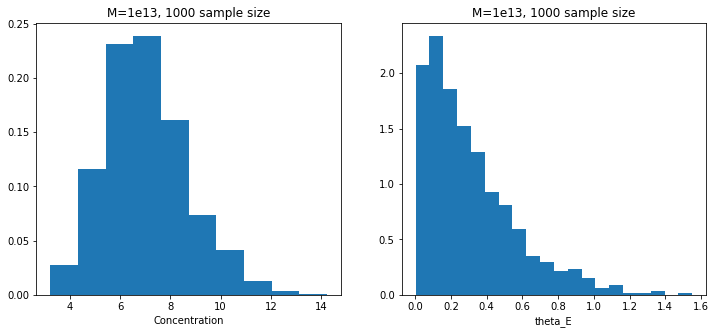

In [37]:
plot(13)

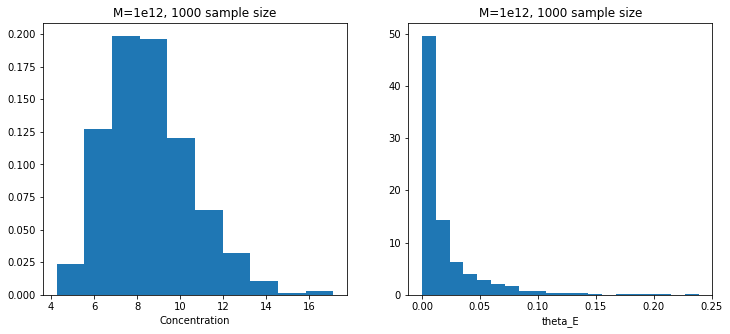

In [20]:
plot(12)

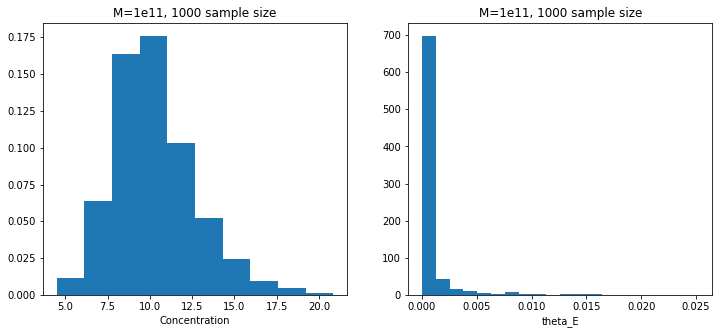

In [21]:
plot(11)